<a href="https://colab.research.google.com/github/a-binkley/SpotifyMLProject/blob/main/Spotify_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Spotify Exploration: Will Your Song be Popular?**

Created by Adrian Binkley & David Carroll, November-December 2020

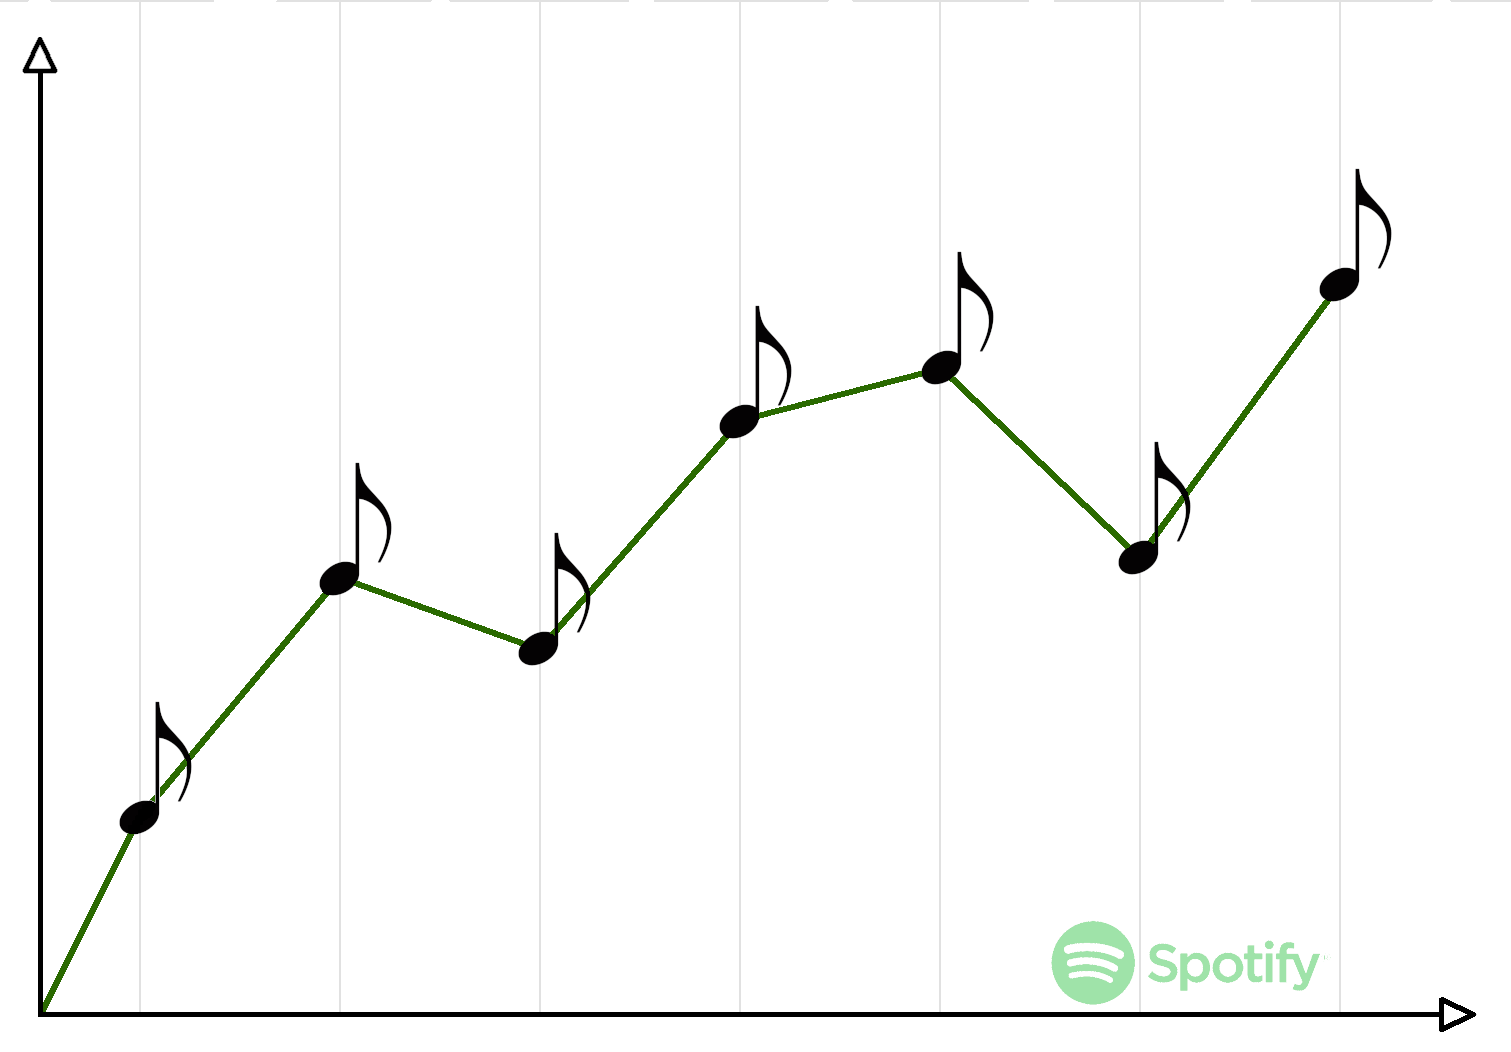

## Overview

This project asks the question: "What makes a song popular?" We address this question using the dataset found [here](https://www.kaggle.com/yamaerenay/spotify-dataset-19212020-160k-tracks), to which we also appended additional features. The resultant analyses were streamlined into a Machine Learning model designed to predict track popularity based on the other preexisting data categorization features. 
We began by cleaning parts of our data. We then used these data in our intermediate section (titled 'Exploratory Data Analysis') to explore feature correlations, trends, and anomalies. We also create UDF's and a web-scraping tool to append genres and artist ages to the original dataset, and then perform similar data analyses on those features.

Our results have a number of possible real-world applications and implications. Select examples include:
- The final ML model could be used by record labels to help determine whether a given song/artist may experience future popularity 
- Analyses of metric correlations (such as songs per year by genre) could be fascinating from a historic perspective, and provide insight into research questions addressing possible connections between the rise/fall of various genre popularities 
- Provide individuals engaged in music curation and event-specific playlist design with quantifiable metrics associated with different listener experiences (i.e., 'danceability', 'key', etc.)

Our primary dataset uses the following features, as outlined in the original dataset:

**Categorical features:**
- <u>*ID*</u>: The URL suffix of the given Spotify track, auto-generated
- <u>*name*</u>: The name of the track
- <u>*artists*</u>: A list of artists associated with a given track
- <u>*release_date*</u>: The date the song was released. Most entries are in 'yyyy-mm-dd' format, but precision varies based on the original dataset
- <u>*key*</u>: The key of the track, ranging from 0 to 11 where 0 = C, 1 = C#, etc.

**Features with continuous range:** 0.0-1.0
- <u>*acousticness*</u>: The relative metric of the track being acoustic
- <u>*danceability*</u>: The relative measurement of the track being danceable
- <u>*energy*</u>: The energy of the track
- <u>*instrumentalness*</u>: The relative ratio of the track being instrumental
- <u>*valence*</u>: The overall "positivity" of the track
- <u>*liveness*</u>: The relative duration of the track sounding as a live performance, i.e. reverb
- <u>*speechiness*</u>: The relative length of the track containing any kind of human voice

**Semi-continuous features:** (ranges vary)
- <u>*year*</u>: What year the track was released, range 1921-2020
- <u>*duration_ms*</u>: How long the track is, in milliseconds, range ~200-300k
- <u>*loudness*</u>: Relative loudness of the track in the typical range [-60, 0], in decibels (dB)
- <u>*tempo*</u>: The tempo of the track in Beats Per Minute (BPM), range ~30-250
- <u>*popularity*</u>: The recent popularity of the track in the U.S., range 0-100

**Binary (dummy) features**:
- <u>*mode*</u>: Whether the track is in a major or a minor key (0 = Minor, 1 = Major)
- <u>*explicit*</u>: Whether the track contains explicit content (0 = No, 1 = Yes)


**Main Challenges/Obstacles we predict facing:**

We can’t feed data directly into a ML model since we have to consider predictable changes in popularity due to duration, genre, artist, etc. We also face the question of determining the most digestible visualizations depending on the feature(s) being quantified, while keeping the graphs useful and concise.Since we want to gather data on the age of artists, we would either need to average the ages of all group members or pick a given role on which to base the “age” of the entire group. In either case, this would need to be done automatically by a UDF (or possible a series of them). A basic example would be to scrape the web for band members, differentiate between current and former members, then go to the current members' pages to retrieve their ages. There are numerous edge cases to consider and quirks of web parsing to keep in mind, but we aim to get at least a rough collection of data to append.

# Section 0: Library setup & package installation

**Note: You will need to restart the runtime after running this cell. If you** **check the output it will give you a message to do so.**

In [ ]:
!pip3 install pandas==1.0.5

In [ ]:
import pandas as pd
print(pd.__version__ == '1.0.5')

True


**When you run this cell, scroll down to the output and enter 2 into the text box and press enter. Make sure you are choosing the Java 8 version**

In [ ]:
# Set up notebook with java
! sudo apt install openjdk-8-jdk
! sudo update-alternatives --config java

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java
  libatk-wrapper-java-jni libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libxxf86dga1 openjdk-8-jdk-headless openjdk-8-jre
  openjdk-8-jre-headless x11-utils
Suggested packages:
  gvfs openjdk-8-demo openjdk-8-source visualvm icedtea-8-plugin libnss-mdns
  fonts-ipafont-gothic fonts-ipafont-mincho fonts-wqy-microhei
  fonts-wqy-zenhei fonts-indic mesa-utils
The following NEW packages will be installed:
  fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java
  libatk-wrapper-java-jni libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libxxf86dga1 openjdk-8-jdk openjdk-8-jdk-headless
  openjdk-8-jre openjdk-8-jre-headless x11-utils
0 upgraded, 15 newly installed, 0 to remove and 14 not upgraded.
Need to get 43.4 MB of archives.
After this 

## The automatic import/installation cells

In [ ]:
# More imports
!apt install libkrb5-dev
!wget https://www-us.apache.org/dist/spark/spark-2.4.5/spark-2.4.5-bin-hadoop2.7.tgz
!pip install findspark
!pip install sparkmagic
!pip install pyspark
!pip install pyspark --user
!pip install seaborn --user

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  comerr-dev krb5-multidev libgssrpc4 libkadm5clnt-mit11 libkadm5srv-mit11
  libkdb5-9
Suggested packages:
  doc-base krb5-doc krb5-user
The following NEW packages will be installed:
  comerr-dev krb5-multidev libgssrpc4 libkadm5clnt-mit11 libkadm5srv-mit11
  libkdb5-9 libkrb5-dev
0 upgraded, 7 newly installed, 0 to remove and 14 not upgraded.
Need to get 349 kB of archives.
After this operation, 1,992 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libgssrpc4 amd64 1.16-2ubuntu0.2 [54.4 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libkdb5-9 amd64 1.16-2ubuntu0.2 [37.3 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libkadm5srv-mit11 amd64 1.16-2ubuntu0.2 [49.7 kB]
Get:4 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libkadm5

In [ ]:
!apt update
!apt install gcc python-dev libkrb5-dev

Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:7 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [40.7 kB]
Get:8 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:9 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:10 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:12 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Ign:13 https://developer.download.nvi

In [ ]:
# Web scraping & IO
import json
import urllib
import urllib.request
from lxml import etree
# Utility
import datetime as dt
from datetime import datetime
import numpy as np
import re
import os
# Spark
import pyspark
from pyspark.sql import SQLContext
from pyspark.sql import SparkSession
from pyspark.sql.types import *
import pyspark.sql.functions as F
# Visualization
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sb

spark = SparkSession.builder.appName('ml-hw4').getOrCreate()

In [ ]:
try:
    if(spark == None):
        spark = SparkSession.builder.appName('Initial').getOrCreate()
        sqlContext=SQLContext(spark)
except NameError:
    spark = SparkSession.builder.appName('Initial').getOrCreate()
    sqlContext=SQLContext(spark)

**If the following cell fails, try re-running the "More imports" cell a few above this one**

In [ ]:
%load_ext sparkmagic.magics

# Section 1: Data Wrangling

## 1.1: Read in the data from our .csv files

We now pull the data for out dataset into the notebook. We have downloaded the data to our GitHub for ease of use and availability. 

The data sources are already partially cleaned. They combine artists such as *Frederic Chopin* and *Frédéric Chopin*, so no ASCII conversions or n-grams are needed for the artists. However, we still need to clean our data of unwanted or invalid values.

In [ ]:
raw_data_df = pd.read_csv("https://raw.githubusercontent.com/a-binkley/SpotifyMLProject/main/data.csv", error_bad_lines=False)
data_by_artist_df = pd.read_csv("https://raw.githubusercontent.com/a-binkley/SpotifyMLProject/main/data_by_artist.csv", error_bad_lines=False)
data_by_genre_df = pd.read_csv("https://raw.githubusercontent.com/a-binkley/SpotifyMLProject/main/data_by_genres.csv", error_bad_lines=False)
data_by_year_df = pd.read_csv("https://raw.githubusercontent.com/a-binkley/SpotifyMLProject/main/data_by_year.csv", error_bad_lines=False)
data_with_genres_df = pd.read_csv("https://raw.githubusercontent.com/a-binkley/SpotifyMLProject/main/data_w_genres.csv", error_bad_lines=False)

## 1.2: Clean the data
Before we do any analysis, we want to finish cleaning our data. Unclean data could compromise the integrity of our results.

We will:
- Strip unnecessary characters from the 'artists' column
- Create a 'numArtists' column for sorting in EDA
- Create a 'duplicate_locator' column for removing (averaging) near-duplicates
- Normalize values in 'release_date' column (add month and day values to entries with only a year given)

In [ ]:
# Remove edge brackets and apostrophes
raw_data_df['artists'] = raw_data_df['artists'].apply(lambda x: x.replace("['", "").replace("']", "").
                                                      replace("', '", ", ").strip())
# Clean up artist names with '/'s in them (e.g., Yusuf / Cat Stevens)
raw_data_df['artists'] = raw_data_df['artists'].apply(lambda x: x.split("/")[1] if len(x.split("/")) > 1 else x.split("/")[0])
numArtists = raw_data_df['artists'].apply(lambda x: len(x.split(",")))
try:
  raw_data_df.insert(2, 'numArtists', numArtists)
except:
  print("numArtists column already exists")

# Create a column to group by for removing duplicate entries
duplicate_locator_artist_list = [str(i) for i in raw_data_df['artists']]
duplicate_locator_tracks_list = [str(i) for i in raw_data_df['name']]
duplicate_locator = []
for entry in range(len(duplicate_locator_artist_list)):
  duplicate_locator.append(duplicate_locator_artist_list[entry] + "_" + duplicate_locator_tracks_list[entry])

# Create a "duplicate locator" to group near-duplicate columns
try:
  raw_data_df.insert(len(raw_data_df.columns), 'duplicate_locator', duplicate_locator)
except:
  print("duplicate_locator column already exists")

raw_data_df['duplicate_locator'] = raw_data_df['duplicate_locator'].apply(lambda x: x.strip())

# Add a month and day to any entries with only a year provided
def normalize_date(entry):
  try:
    return pd.to_datetime(entry, format='%Y-%m-%d')
  except:
    return pd.to_datetime(entry + '-07-01', format='%Y-%m-%d')

raw_data_df['release_date'] = raw_data_df['release_date'].apply(lambda x: normalize_date(x).date())

A few examples of the near-duplicate tracks to be taken care of:

In [ ]:
elliott_smith_df = raw_data_df[raw_data_df['artists'] == 'Elliott Smith']
two_forty_five_am_df = elliott_smith_df[elliott_smith_df['name'] == '2:45 AM']

green_day_df = raw_data_df[raw_data_df['artists'] == 'Green Day']
american_idiot_df = green_day_df[green_day_df['name'] == 'American Idiot']

nirvana_df = raw_data_df[raw_data_df['artists'] == 'Nirvana']
lithium_df = nirvana_df[nirvana_df['name'] == 'Lithium']

display(american_idiot_df, two_forty_five_am_df, lithium_df)

,acousticness,artists,numArtists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,duplicate_locator
86343,0.000026,Green Day,1,0.380,176346,0.988,1,6nTiIhLmQ3FWhvrGafw2zj,0.000079,1,0.368,-2.042,1,American Idiot,78,2004-09-21,0.0639,186.113,0.769,2004,Green Day_American Idiot
96221,0.000025,Green Day,1,0.381,174320,0.984,1,45zvStEMsXp8z45OQRhWFJ,0.000069,1,0.270,-2.420,1,American Idiot,61,2004-09-21,0.0638,186.081,0.810,2004,Green Day_American Idiot


,acousticness,artists,numArtists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,duplicate_locator
29917,0.782,Elliott Smith,1,0.489,198973,0.0858,0,53q5m5Bpkr1Pin7mPKQxMi,0.000109,4,0.111,-20.465,0,2:45 AM,36,1997-02-25,0.0432,167.284,0.368,1997,Elliott Smith_2:45 AM
60929,0.748,Elliott Smith,1,0.474,198973,0.1410,1,4MbqSOWDQ3zxn7qED7IJ3S,0.000062,4,0.119,-15.955,0,2:45 AM,34,1997-02-25,0.0426,167.097,0.365,1997,Elliott Smith_2:45 AM


,acousticness,artists,numArtists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,duplicate_locator
37431,0.000203,Nirvana,1,0.688,259093,0.599,0,4PQYaZY5AFHgTvWXkUbYzT,0.0,7,0.0782,-9.176,1,Lithium,31,1992-01-01,0.0380,123.265,0.388,1992,Nirvana_Lithium
45135,0.001740,Nirvana,1,0.678,257053,0.656,0,5WCO8McOtMU6T1Xy4NodyT,0.0,7,0.0631,-6.410,1,Lithium,31,1991-09-26,0.0381,123.207,0.485,1991,Nirvana_Lithium
46234,0.001350,Nirvana,1,0.688,255213,0.685,0,4ZJz3TASJ0TA9vF1KrZvUz,0.0,7,0.0679,-5.815,1,Lithium,46,2002-10-29,0.0377,123.156,0.405,2002,Nirvana_Lithium
85048,0.001740,Nirvana,1,0.678,257053,0.656,0,2YodwKJnbPyNKe8XXSE9V7,0.0,7,0.0631,-6.410,1,Lithium,68,1991-09-26,0.0381,123.207,0.485,1991,Nirvana_Lithium
132600,0.001740,Nirvana,1,0.678,257053,0.656,0,07hCnHx9DhqZg5eN6RvCbd,0.0,7,0.0631,-6.410,1,Lithium,39,1991-09-26,0.0381,123.207,0.485,1991,Nirvana_Lithium
158577,0.001740,Nirvana,1,0.678,257053,0.656,0,2sPUMVRLMSHWdqJHzmZaLC,0.0,7,0.0631,-6.410,1,Lithium,35,1991-09-26,0.0381,123.207,0.485,1991,Nirvana_Lithium


## 1.3: Clean up duplicate entries

In [ ]:
# Convert to a Spark dataframe, save the view
raw_data_sdf = spark.createDataFrame(raw_data_df)
raw_data_sdf.createOrReplaceTempView('raw_data')

Cleaning method: if 'artists' and 'name' are identical, average 'acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'popularity', 'speechiness', 'tempo', and 'valence'. Keep 'ID', 'artists', 'numArtists', 'explicit', 'key', 'mode', 'name', 'release_date', and 'year' of the earliest of the duplicate entries.

In [ ]:
cleaned_data_sdf = spark.sql('''SELECT MAX(id) AS id, AVG(acousticness) AS acousticness, MAX(artists) AS artists, 
                                    MAX(numArtists) AS numArtists, AVG(danceability) AS danceability, 
                                    int(AVG(duration_ms)) AS duration_ms, AVG(energy) AS energy, MAX(explicit) AS explicit, 
                                    AVG(instrumentalness) AS instrumentalness, int(AVG(key)) AS key, 
                                    AVG(liveness) AS liveness, AVG(loudness) AS loudness, int(AVG(mode)) AS mode, 
                                    MAX(name) AS name, int(AVG(popularity)) AS popularity, MIN(release_date) AS release_date, 
                                    AVG(speechiness) AS speechiness, AVG(tempo) AS tempo, AVG(valence) AS valence, 
                                    MIN(year) AS year, duplicate_locator, COUNT(duplicate_locator) AS num_duplicates
                                    FROM raw_data GROUP BY duplicate_locator ORDER BY num_duplicates DESC''')
cleaned_data_sdf.createOrReplaceTempView('cleaned_data')
cleaned_data_df = cleaned_data_sdf.toPandas()
cleaned_data_df.set_index('id', inplace=True)
cleaned_data_df.drop(columns='duplicate_locator', inplace=True)

# Confirm we didn't invalidate the data by dropping entries incorrectly
print('Datasets cleaned properly? (T/F):', len(raw_data_df) == sum(cleaned_data_df['num_duplicates']))

Datasets cleaned properly? (T/F): True


## 1.4: Set up a dataframe with only the single-artist tracks (for age linking)

In [ ]:
# Narrow down to just the single-artist (or single-group) entries
single_artist_df = cleaned_data_df[cleaned_data_df['numArtists'] == 1].copy()
single_artist_df.sort_values('id', inplace=True)

### 1.4.1: Add 'age' column for each track

Tells us how old the artist was when the given track was released,
or the average artist age in a group for the same metric

**Note:** this section has been commented out to avoid re-running unnecessary cells, but the code containing what was done previously is still present for reference

Brief summary:

- Scrape Wikipedia for artist age (or average age if the entry is a group): 
- Look for labels 'Born', 'Members', and 'Past members'. 'Born' gives us the value we want, while the other two are lists of artists with 'Born' labels on their respective Wikipedia pages. 
- If neither label is present, try adding '_(band)' to the URL. If it still fails, give null value for age so the entry is dropped later. 

This accounts for "artists" such as orchestras, choirs, etc. Also, some of the "artists" are actually composers, which will throw off values for age-linking. Later on, we can visualize the spread (with a bar plot by age) and use the results of that to more effectively remove stray values.

We retrieved and created these values in 5000 track increments. The cells took a long time to run so we felt this best to avoid connectivity issues forcing us to restart. When we got a batch we uploaded those csv files to S3, and once all were complete, we aggregated them together into a single csv that we are now hosting on GitHub. We used an **AWS** EMR cluster with a custom bootstrapping shell script to achieve this goal. 

In [ ]:
'''
def get_xpath_tree(string):
  url = 'https://en.wikipedia.org/wiki/'+ string.replace(" ", "_")
  url_list = list(urllib.parse.urlsplit(url))
  url_list[2] = urllib.parse.quote(url_list[2])
  url_ascii = urllib.parse.urlunsplit(url_list)
  try:
    response = urllib.request.urlopen((url_ascii))
  except urllib.error.URLError as e:
    return (0, None)
  return (1, etree.HTML(response.read().decode("utf-8")))

def get_age(tree):
  try:
    bday = tree[1].xpath('//table[contains(@class,"vcard")]//span[@class="bday"]/text()')
  except:
    return pd.to_datetime('1800-01-01', format='%Y-%m-%d')
  if len(bday) > 0:
    # Birthday found, so return it as a datetime
    try:
      return pd.to_datetime(bday[0], format='%Y-%m-%d')
    except:
      return pd.to_datetime('1800-01-01', format='%Y-%m-%d') # To catch any birthdays outside the range of datetime (before 1677-09-21)
  else:
    # No birthday found, so return a stub value
    return pd.to_datetime('1800-01-01', format='%Y-%m-%d')

def get_members(tree):
  # Check if there are labels for Members / Former members
  try:
    members = tree[1].xpath('//table[contains(@class,"vcard")]//tr[th/text()="Members"]/td//text()')
    past_members = tree[1].xpath('//table[contains(@class,"vcard")]//tr[th/span/text()="Past members"]/td//text()')
  except:
    return []
  members_cleaned = []
  past_members_cleaned = []
  for m in members:
    if (str(m).find('\n') == -1) & (str(m).islower() == False) & (len(str(m).split()) < 3):
      members_cleaned.append(m)
  for m in past_members:
    if (str(m).find('\n') == -1) & (str(m).islower() == False) & (len(str(m).split()) < 3):
      past_members_cleaned.append(m)
  if (len(members_cleaned) == 0) & (len(past_members_cleaned) == 0):
    return [] # Bad url
  return members_cleaned + past_members_cleaned
'''

'\ndef get_xpath_tree(string):\n  url = \'https://en.wikipedia.org/wiki/\'+ string.replace(" ", "_")\n  url_list = list(urllib.parse.urlsplit(url))\n  url_list[2] = urllib.parse.quote(url_list[2])\n  url_ascii = urllib.parse.urlunsplit(url_list)\n  try:\n    response = urllib.request.urlopen((url_ascii))\n  except urllib.error.URLError as e:\n    return (0, None)\n  return (1, etree.HTML(response.read().decode("utf-8")))\n\ndef get_age(tree):\n  try:\n    bday = tree[1].xpath(\'//table[contains(@class,"vcard")]//span[@class="bday"]/text()\')\n  except:\n    return pd.to_datetime(\'1800-01-01\', format=\'%Y-%m-%d\')\n  if len(bday) > 0:\n    # Birthday found, so return it as a datetime\n    try:\n      return pd.to_datetime(bday[0], format=\'%Y-%m-%d\')\n    except:\n      return pd.to_datetime(\'1800-01-01\', format=\'%Y-%m-%d\') # To catch any birthdays outside the range of datetime (before 1677-09-21)\n  else:\n    # No birthday found, so return a stub value\n    return pd.to_datetim

In [ ]:
'''
# Populate dict for artist age(s)
def add_birthday(selected_artist, release):
  tree = get_xpath_tree(selected_artist)
  if tree[0] == 0:
    tree = get_xpath_tree(selected_artist + ' (band)') # Was bad URL
    if tree[0] == 0:
      return np.NaN # No page found for current artist, so return null
  bday = get_age(tree[1])
  if bday > pd.to_datetime('1800-01-01', format='%Y-%m-%d'):
    return bday.date() # Artist is a person
  else:
    # No birthday found, but URL is valid
    # Check if the page has a "Members" or "Past members" section
    tree = get_xpath_tree(selected_artist)
    if tree[0] == 0:
      tree = get_xpath_tree(selected_artist + ' (band)')
    # We know one of the above worked, otherwise we would have returned by now
    members = get_members(tree)
    if len(members) > 0:
      # Get the birthdays of each member and return the averaged result
      days_to_average = 0
      num_results = 0
      for m in members:
        mem_tree = get_xpath_tree(m)
        if mem_tree[0] == 0:
          continue
        bday = get_age(mem_tree[1])
        if (bday > pd.to_datetime('1800-01-01', format='%Y-%m-%d')) & (bday < release):
          additional_days = (bday - pd.to_datetime('1800-01-01', format='%Y-%m-%d')).days
          days_to_average = days_to_average + additional_days
          num_results = num_results + 1
      if num_results > 0:
        return pd.to_datetime(pd.to_datetime('1800-01-01', format='%Y-%m-%d') + dt.timedelta(int(days_to_average / num_results))).date()
      return np.NaN
    else:
      # Try again with the other URL
      if tree == get_xpath_tree(selected_artist + ' (band)'):
        tree = get_xpath_tree(selected_artist)
      else:
        tree = get_xpath_tree(selected_artist + ' (band)')
      members = get_members(tree)
      if len(members) > 0:
        if len(members) == 1:
          mem_tree = get_xpath_tree(members[0])
          if mem_tree[0] == 0:
            return np.NaN
          bday = get_age(mem_tree[1])
          if bday > pd.to_datetime('1800-01-01', format='%Y-%m-%d'):
            return bday.date()
          return np.NaN
        # Get the birthdays of each member and return the averaged result
        days_to_average = 0
        num_results = 0
        for m in members:
          mem_tree = get_xpath_tree(m)
          if mem_tree[0] == 0:
            continue
          bday = get_age(mem_tree[1])
          if (bday > pd.to_datetime('1800-01-01', format='%Y-%m-%d')) & (bday < release):
            additional_days = (bday - pd.to_datetime('1800-01-01', format='%Y-%m-%d')).days
            days_to_average = days_to_average + additional_days
            num_results = num_results + 1
        if num_results > 0:
          return pd.to_datetime(pd.to_datetime('1800-01-01', format='%Y-%m-%d') + dt.timedelta(int(days_to_average / num_results))).date()
      return np.NaN
'''

'\n# Populate dict for artist age(s)\ndef add_birthday(selected_artist, release):\n  tree = get_xpath_tree(selected_artist)\n  if tree[0] == 0:\n    tree = get_xpath_tree(selected_artist + \' (band)\') # Was bad URL\n    if tree[0] == 0:\n      return np.NaN # No page found for current artist, so return null\n  bday = get_age(tree[1])\n  if bday > pd.to_datetime(\'1800-01-01\', format=\'%Y-%m-%d\'):\n    return bday.date() # Artist is a person\n  else:\n    # No birthday found, but URL is valid\n    # Check if the page has a "Members" or "Past members" section\n    tree = get_xpath_tree(selected_artist)\n    if tree[0] == 0:\n      tree = get_xpath_tree(selected_artist + \' (band)\')\n    # We know one of the above worked, otherwise we would have returned by now\n    members = get_members(tree)\n    if len(members) > 0:\n      # Get the birthdays of each member and return the averaged result\n      days_to_average = 0\n      num_results = 0\n      for m in members:\n        mem_tree = 

In [ ]:
'''
# A brief demonstration of what is added to the dataframe
for i in range(10):
  print(single_artist_df['artists'].iat[i] + ": " + str(add_birthday(single_artist_df['artists'].iat[i], single_artist_df['release_date'].iat[i])))
'''

'\n# A brief demonstration of what is added to the dataframe\nfor i in range(10):\n  print(single_artist_df[\'artists\'].iat[i] + ": " + str(add_birthday(single_artist_df[\'artists\'].iat[i], single_artist_df[\'release_date\'].iat[i])))\n'

In [ ]:
'''
# Dataframe has 124727 rows in total
start = 0
end = start + 5000
artist_ages_df = single_artist_df.iloc[np.arange(start, end)].copy()
# Reorder the columns to something more logically grouped
artist_ages_df = artist_ages_df[['artists', 'name', 'release_date', 'popularity', 'duration_ms',	'danceability', 'energy',	'explicit', 'instrumentalness',	
                                 'key', 'mode', 'liveness', 'loudness', 'acousticness',	'speechiness', 'tempo',	'valence', 'year', 'num_duplicates']]
artist_ages_df.insert(2, 'born_or_started', np.NaN)
artist_ages_df.insert(3, 'age_at_release', np.NaN)
artist_ages_df['born_or_started'] = artist_ages_df.apply(lambda x: add_birthday(x['artists'], x['release_date']), axis=1) 
artist_ages_df.dropna(subset=['born_or_started'], inplace=True)
artist_ages_df['age_at_release'] = artist_ages_df.apply(lambda x: int((x['release_date'] - x['born_or_started']).days / 365.25), axis=1)
'''

"\n# Dataframe has 124727 rows in total\nstart = 0\nend = start + 5000\nartist_ages_df = single_artist_df.iloc[np.arange(start, end)].copy()\n# Reorder the columns to something more logically grouped\nartist_ages_df = artist_ages_df[['artists', 'name', 'release_date', 'popularity', 'duration_ms',\t'danceability', 'energy',\t'explicit', 'instrumentalness',\t\n                                 'key', 'mode', 'liveness', 'loudness', 'acousticness',\t'speechiness', 'tempo',\t'valence', 'year', 'num_duplicates']]\nartist_ages_df.insert(2, 'born_or_started', np.NaN)\nartist_ages_df.insert(3, 'age_at_release', np.NaN)\nartist_ages_df['born_or_started'] = artist_ages_df.apply(lambda x: add_birthday(x['artists'], x['release_date']), axis=1) \nartist_ages_df.dropna(subset=['born_or_started'], inplace=True)\nartist_ages_df['age_at_release'] = artist_ages_df.apply(lambda x: int((x['release_date'] - x['born_or_started']).days / 365.25), axis=1)\n"

In [ ]:
'''
dest = '545-final-project-spotify'

def write_df_to_csv_s3(dataframe, filename):
    print("Writing {} records to {}".format(len(dataframe), filename))
    # Create buffer
    csv_buffer = StringIO()
    # Write dataframe to the buffer 
    dataframe.to_csv(csv_buffer, sep=',')
    # Create an S3 object
    s3_resource = boto3.resource('s3')
    # Write buffer to the S3 object
    s3_resource.Object(dest, filename).put(Body=csv_buffer.getvalue())

filename = "single_artists_with_ages_{}_{}.csv".format(start, end)

write_df_to_csv_s3(artist_ages_df, filename)

# Save the result to an S3 bucket, which will then be copied to raw GitHub csv's
# This avoids the requirement of EMR clusters for every run of the notebook in the future
'''

'\ndest = \'545-final-project-spotify\'\n\ndef write_df_to_csv_s3(dataframe, filename):\n    print("Writing {} records to {}".format(len(dataframe), filename))\n    # Create buffer\n    csv_buffer = StringIO()\n    # Write dataframe to the buffer \n    dataframe.to_csv(csv_buffer, sep=\',\')\n    # Create an S3 object\n    s3_resource = boto3.resource(\'s3\')\n    # Write buffer to the S3 object\n    s3_resource.Object(dest, filename).put(Body=csv_buffer.getvalue())\n\nfilename = "single_artists_with_ages_{}_{}.csv".format(start, end)\n\nwrite_df_to_csv_s3(artist_ages_df, filename)\n\n# Save the result to an S3 bucket, which will then be copied to raw GitHub csv\'s\n# This avoids the requirement of EMR clusters for every run of the notebook in the future\n'

In [ ]:
'''
# Load in all of the fragmented df's
df_pieces_list = []

for i in range(24):
  df_pieces_list.append(pd.read_csv('https://raw.githubusercontent.com/a-binkley/SpotifyMLProject/main/single_artists_with_ages_{}_{}.csv'.format(i * 5000, (i+1) * 5000), 
                                    error_bad_lines=False))

df_pieces_list.append(pd.read_csv("https://raw.githubusercontent.com/a-binkley/SpotifyMLProject/main/single_artists_with_ages_120000_124727.csv", error_bad_lines=False))
'''

'\n# Load in all of the fragmented df\'s\ndf_pieces_list = []\n\nfor i in range(24):\n  df_pieces_list.append(pd.read_csv(\'https://raw.githubusercontent.com/a-binkley/SpotifyMLProject/main/single_artists_with_ages_{}_{}.csv\'.format(i * 5000, (i+1) * 5000), \n                                    error_bad_lines=False))\n\ndf_pieces_list.append(pd.read_csv("https://raw.githubusercontent.com/a-binkley/SpotifyMLProject/main/single_artists_with_ages_120000_124727.csv", error_bad_lines=False))\n'

In [ ]:
'''
# Concatenate them into a master dataframe: single_artist_w_ages_df
single_artist_w_ages_df = pd.concat([i for i in df_pieces_list])
single_artist_w_ages_df.to_csv(r'single_artist_w_ages.csv')
'''

"\n# Concatenate them into a master dataframe: single_artist_w_ages_df\nsingle_artist_w_ages_df = pd.concat([i for i in df_pieces_list])\nsingle_artist_w_ages_df.to_csv(r'single_artist_w_ages.csv')\n"

# Section 2: Exploratory Data Analysis
In this section we explore our data and create visualizations to give a better understanding of the data available. We also point out possible abnormalities to keep in mind when creating a ML model. We believe that the visualizations created in this section will help form hypotheses regarding the most important features for predicting popularity.

In [ ]:
# Set the graph style for all graphs in this section
sb.set_style('whitegrid')

### 2.1: General feature statistics

#### 2.1.1: Number of Tracks (log.) vs. Number of Artists

We first look at the number of tracks released and sort them by the number of listed artists on the track. Keep in mind that this groups artists such as 'David Bowie' and 'The Beatles' into the same category, so categories of more than one artist imply collaboration or a larger (perhaps orchestral) ensemble.

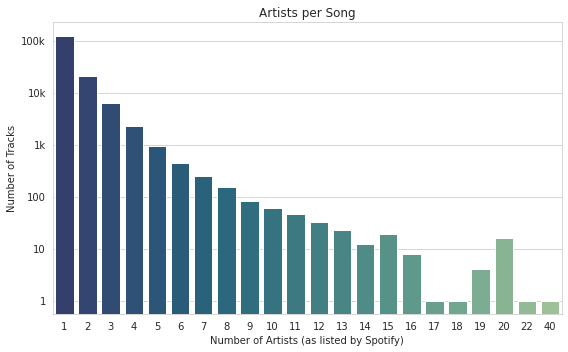

In [ ]:
artist_distrib_df = spark.sql('''SELECT COUNT(name) AS numTracks, numArtists FROM cleaned_data 
                                GROUP BY numArtists ORDER BY numArtists ASC''').toPandas()

fig = plt.figure(figsize=(8, 5))
g = sb.barplot(x=artist_distrib_df['numArtists'], y=artist_distrib_df['numTracks'], palette="crest_r")
g.set_yscale("log")
g.set_title("Artists per Song")
g.set_xlabel("Number of Artists (as listed by Spotify)")
g.set_ylabel("Number of Tracks")
g.set_yticklabels(['_', '0', '1', '10', '100', '1k', '10k', '100k'])
fig.tight_layout()

As expected, most of the songs in our data are from a single artist - and the quantity per artist sharply decreases beyond that. We have a smaller number of tracks that could be seen as collaborative, and almost no tracks (relative to the total dataset size) with a double-digit number of artists listed.

#### 2.1.2: Songs by Key/Mode

We also want to understand if there are any clear indications of a preferred Key/Mode for songs. For those who are not musically inclined (such as myself - Dave), here are some links to read up on what [Key](https://en.wikipedia.org/wiki/Key_(music)) and [Mode](https://en.wikipedia.org/wiki/Mode_(music)) actually are. We also provide links below that explore Mode in more depth. 

In [ ]:
songs_by_key_df = spark.sql('''SELECT COUNT(id) as num_tracks, key, mode FROM cleaned_data 
                              GROUP BY key, mode ORDER BY key ASC, mode ASC''').toPandas()

# Check that we captured all values
print('Key mappings captured properly? (T/F):', len(cleaned_data_df) == sum(songs_by_key_df['num_tracks']))

Key mappings captured properly? (T/F): True


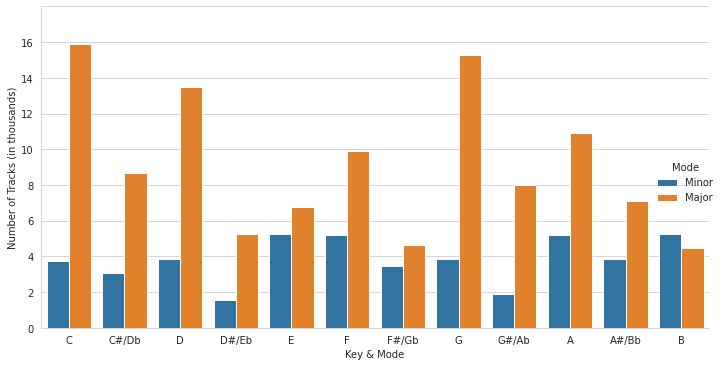

In [ ]:
track_keys_list = [i for i in songs_by_key_df['key']]
track_modes_list = [i for i in songs_by_key_df['mode']]

g = sb.catplot(x=track_keys_list, y=songs_by_key_df['num_tracks'], hue=track_modes_list, data=songs_by_key_df, kind='bar', aspect=1.2)
g.set_titles('Songs by Key/Mode')
g.legend.set_title('Mode')
plt.tight_layout()
for t, l in zip(g.legend.texts, ['Minor', 'Major']): t.set_text(l)
g.set_xlabels("Key & Mode")
g.set_xticklabels(['C', 'C#/Db', 'D', 'D#/Eb', 'E', 'F', 'F#/Gb', 'G', 'G#/Ab', 'A', 'A#/Bb', 'B'])
g.set_ylabels("Number of Tracks (in thousands)")
yt = g.set_yticklabels(np.arange(0, 17, 2))

Interestingly, **B** is the only key in which the minor mode is more popular than the major mode. This could be due to a variety of factors, among which are:
- On a piano, B Major is a difficult key to play, so pianists looking for a major-mode song might be more inclined to pick a different key. On the other hand (no pun intended), B minor is relatively simple due to it having significantly fewer black keys (only two, compared to the five in B Major)
- Many orchestral instruments are not naturally designed to play fluidly in the key of B. E.g., trumpets often play in F and Bb, clarinets in Bb or A, etc. This means that pieces written to include such instruments would likely be wary of using the key of B at all

#### 2.1.3: Multi-line Continuous Features by Year

We now explore how our different metrics have changed over time. Music evolves diachronically, just like fashion and language. We create a series of graphs that allow us to visualize this and see exactly what music metrics have changed, and how they have evolved. 

As an example, let's take a look at a song that was popular in the late 1990s and early 2000s, and compare it to any popular song today (you can choose today's music). [This](https://www.youtube.com/watch?v=GxBSyx85Kp8) sure does make me feel old. Let the nostalgia begin. Enjoy :)

[Bonus track](https://www.youtube.com/watch?v=nWK0kqjPSVI): my favorite song and live performance of all time.

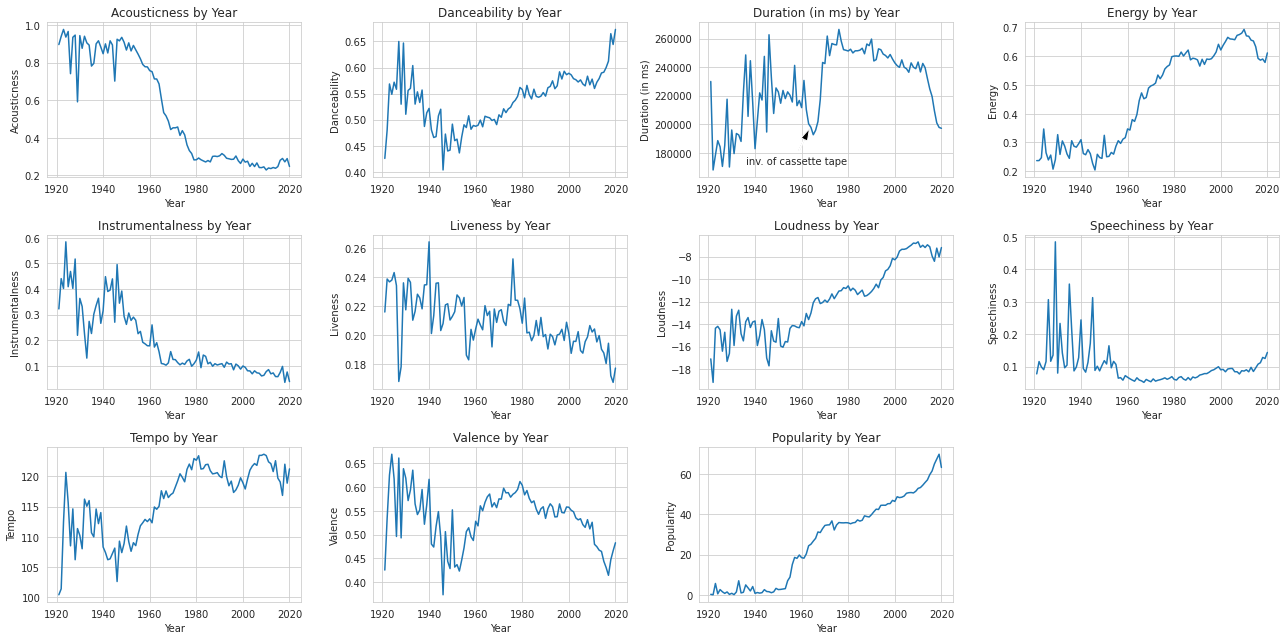

In [ ]:
fig, axs = plt.subplots(3, 4, figsize=(18, 9))
feature_list = ["Acousticness", "Danceability", "Duration_ms", "Energy", "Instrumentalness", 
                "Liveness", "Loudness", "Speechiness", "Tempo", "Valence", "Popularity"]

# Plot all of the subgraphs
for i in range(11):
  title = "{} by Year".format(feature_list[i]).replace("_ms", " (in ms)")
  x = int(i / 4)
  y = i % 4
  axs[x][y].set_title(title)
  axs[x][y].plot(data_by_year_df['year'], data_by_year_df[feature_list[i].casefold()])
  axs[x][y].set_xlabel("Year")
  axs[x][y].set_ylabel(feature_list[i].replace("_ms", " (in ms)"))
  
# Label the point when the cassette tape was invented (see Findings below)
axs[0][2].annotate('inv. of cassette tape', xy=(1964, 199000), xytext=(1936, 172000), 
                   arrowprops=dict(facecolor='black', width=1, headwidth=7, shrink = 0.1))
axs[2][3].remove() # Remove the empty graph from the end of our subplots
fig.tight_layout()

Based on these averages, several patterns become visible:
- Acousticness fell sharply beginning in the 1960s
- Danceability surged in the 1920s and 1930s before plummeting after WWII
- Song duration exhibits a wide range until about 1970, when the values appear to stabilize. Notably, the cassette tape (which offered greatly increased storage compared to its predecessors) was invented in late 1963. The sharp rise in average song duration shortly thereafter could be partially attributed to the public's reception of this audio storage medium - and the greater degree of freedom it afforded artists
- Energy has grown over time, starting in the 1950s
- Instrumentalness has gradually decreased over time
- Liveness has also gradually decreased over time, although its range has remained wider
- Loudness has increased over time, consistently since the 1950s
- Speechiness was at its highest before the 1950s after which it has remained relatively low
- Popularity has greatly increased over time, likely due to the nature of our data source

#### 2.1.4: Correlation Matrix

Let's plot a correlation matrix to see which features are most closely correlated.

In [ ]:
correlation_matrix = cleaned_data_df.corr()
correlation_matrix.style.background_gradient()

,acousticness,numArtists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year,num_duplicates
acousticness,1.000000,0.201662,-0.262985,-0.078299,-0.748159,-0.258578,0.329080,-0.022317,-0.023702,-0.562743,0.047514,-0.593768,-0.055354,-0.206111,-0.177373,-0.620118,-0.022219
numArtists,0.201662,1.000000,-0.130640,0.095854,-0.181822,0.034388,0.091618,-0.013044,0.029089,-0.178871,-0.003709,-0.152576,0.032606,-0.085821,-0.162348,-0.120737,-0.014561
danceability,-0.262985,-0.130640,1.000000,-0.135075,0.216586,0.247364,-0.278856,0.022842,-0.104936,0.291013,-0.046559,0.213054,0.230010,-0.002803,0.559327,0.193981,0.012613
duration_ms,-0.078299,0.095854,-0.135075,1.000000,0.036692,-0.046909,0.083764,-0.001702,0.034586,-0.015454,-0.044914,0.066853,-0.059940,-0.028110,-0.197633,0.080113,0.009495
energy,-0.748159,-0.181822,0.216586,0.036692,1.000000,0.141503,-0.281015,0.031117,0.126147,0.781371,-0.039349,0.496701,-0.053129,0.250789,0.344294,0.527496,0.019154
explicit,-0.258578,0.034388,0.247364,-0.046909,0.141503,1.000000,-0.141595,0.006964,0.039495,0.150475,-0.082451,0.216056,0.414791,0.012612,-0.021581,0.245581,-0.018588
instrumentalness,0.329080,0.091618,-0.278856,0.083764,-0.281015,-0.141595,1.000000,-0.014971,-0.050061,-0.409009,-0.034667,-0.287826,-0.119094,-0.105887,-0.187998,-0.277529,-0.012518
key,-0.022317,-0.013044,0.022842,-0.001702,0.031117,0.006964,-0.014971,1.000000,-0.000136,0.022513,-0.113430,0.011210,0.015067,0.002970,0.029223,0.012657,-0.003992
liveness,-0.023702,0.029089,-0.104936,0.034586,0.126147,0.039495,-0.050061,-0.000136,1.000000,0.050970,0.005530,-0.078673,0.150044,0.006576,-0.000174,-0.058976,-0.017492
loudness,-0.562743,-0.178871,0.291013,-0.015454,0.781371,0.150475,-0.409009,0.022513,0.050970,1.000000,-0.012964,0.462928,-0.115877,0.212524,0.305504,0.483121,0.014115


This table implies that 'popularity' and 'year' are highly (positively) correlated, as are 'loudness' and 'energy'. On the other hand, 'energy' and 'acousticness' have a visible negative correlation. This could be key to note in our ML model. As expected, 'year' is an important metric in determining the popularity of a song.

#### 2.1.5: Key Usage by Year
One thing we were not able to capture above is 'key' usage with respect to year. Let's do that now.

We use cleaned_data_df instead of data_by_year_df with respect to the 'key' and 'mode' attributes, since the data in the latter only gives the most frequent value for 'key' and 'mode' in a given year, but does not list all 12 keys or both modes at once.

In [ ]:
songs_per_year_df = spark.sql('SELECT year, COUNT(id) AS number_of_tracks FROM cleaned_data GROUP BY year ORDER BY year ASC').toPandas()
songs_per_year_df.set_index('year', inplace=True)
yearly_track_count = songs_per_year_df.to_dict('index')

key_freq_by_year_df = spark.sql('''SELECT year, key, COUNT(key) AS frequency FROM cleaned_data GROUP BY year, key
                                  ORDER BY year ASC, key ASC''').toPandas()

# Map out our values
key_list = ['C', 'C#/Db', 'D', 'D#/Eb', 'E', 'F', 'F#/Gb', 'G', 'G#/Ab', 'A', 'A#/Bb', 'B']
key_freq_by_year_df['key'] = key_freq_by_year_df['key'].apply(lambda x: key_list[x])
key_freq_by_year_df['frequency'] = key_freq_by_year_df.apply(lambda x: 100 * x['frequency'] / yearly_track_count.get(x['year']).get('number_of_tracks'), axis=1)

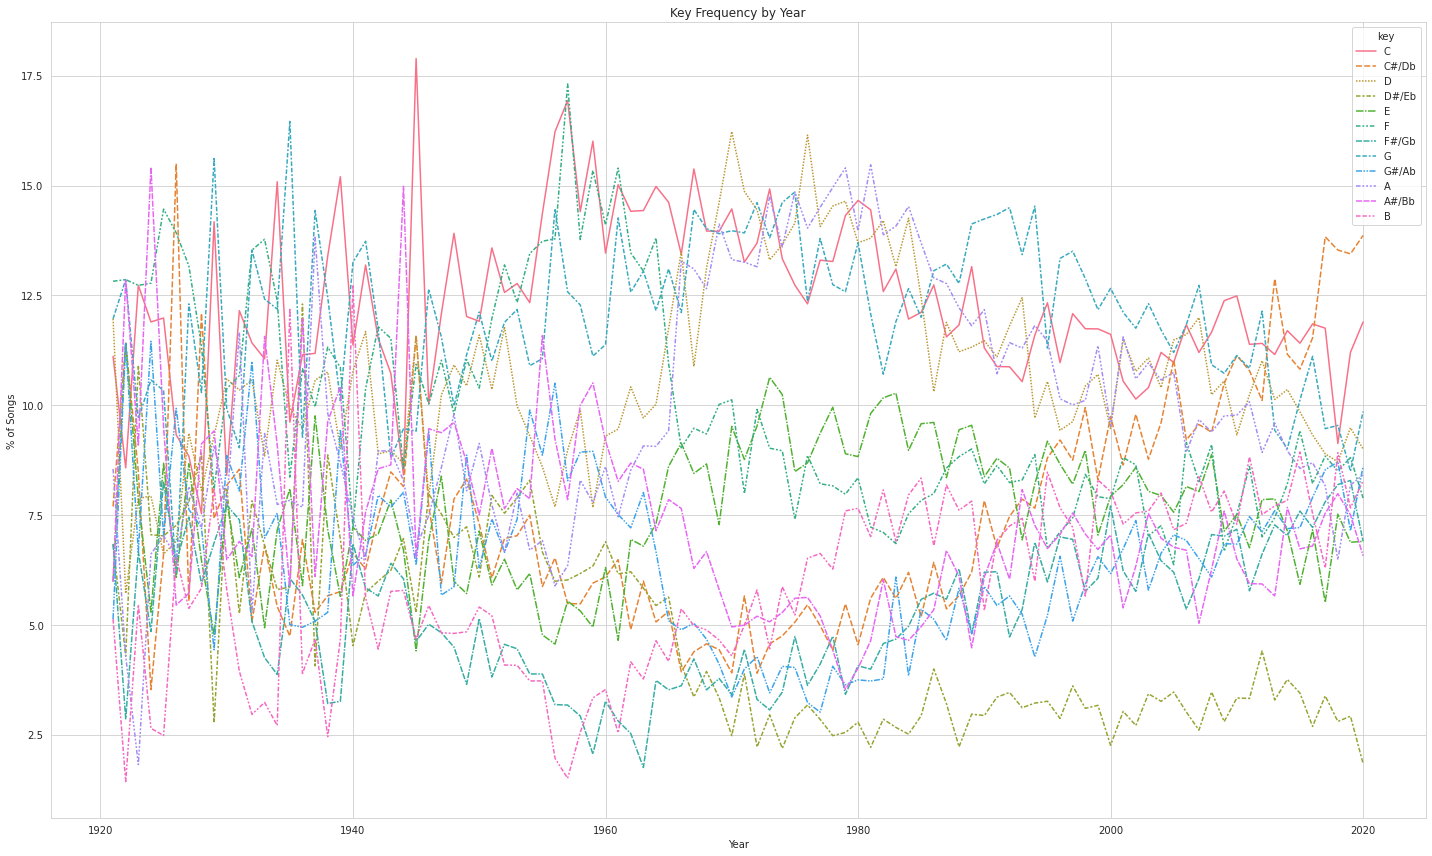

In [ ]:
# Plot everything
fig = plt.figure(figsize=(20, 12))
key_freq_plot = sb.lineplot(data=key_freq_by_year_df, x="year", y="frequency", hue="key", style="key")
key_freq_plot.set_title("Key Frequency by Year")
key_freq_plot.set(xlabel='Year', ylabel='% of Songs')

fig.tight_layout()

We can extract a couple of observations from the graph above:
- As shown in the previous distribution of Songs by Key & Mode, C Major and G Major enjoy consistent spots near the top of the frequency distribution, while D#\Eb is consistently near the bottom
- However, C#/Db makes a significant surge beginning in the 1970s, and it actually becomes the most frequently-used key in the late 2010s
- Even though we know D#/Eb is unpopular, the degree of that separation from the other keys is striking - and it's been the uncontested least frequently-used key since at least the late 1970s (the margin was smaller in the late 1960s, but in our data it was still the least popular at that point)

#### 2.1.6: Mode Usage by Year

Let's also create a chronological visualization for 'mode'. We include shadings to mark a few key events that occurred in the given timeframe.

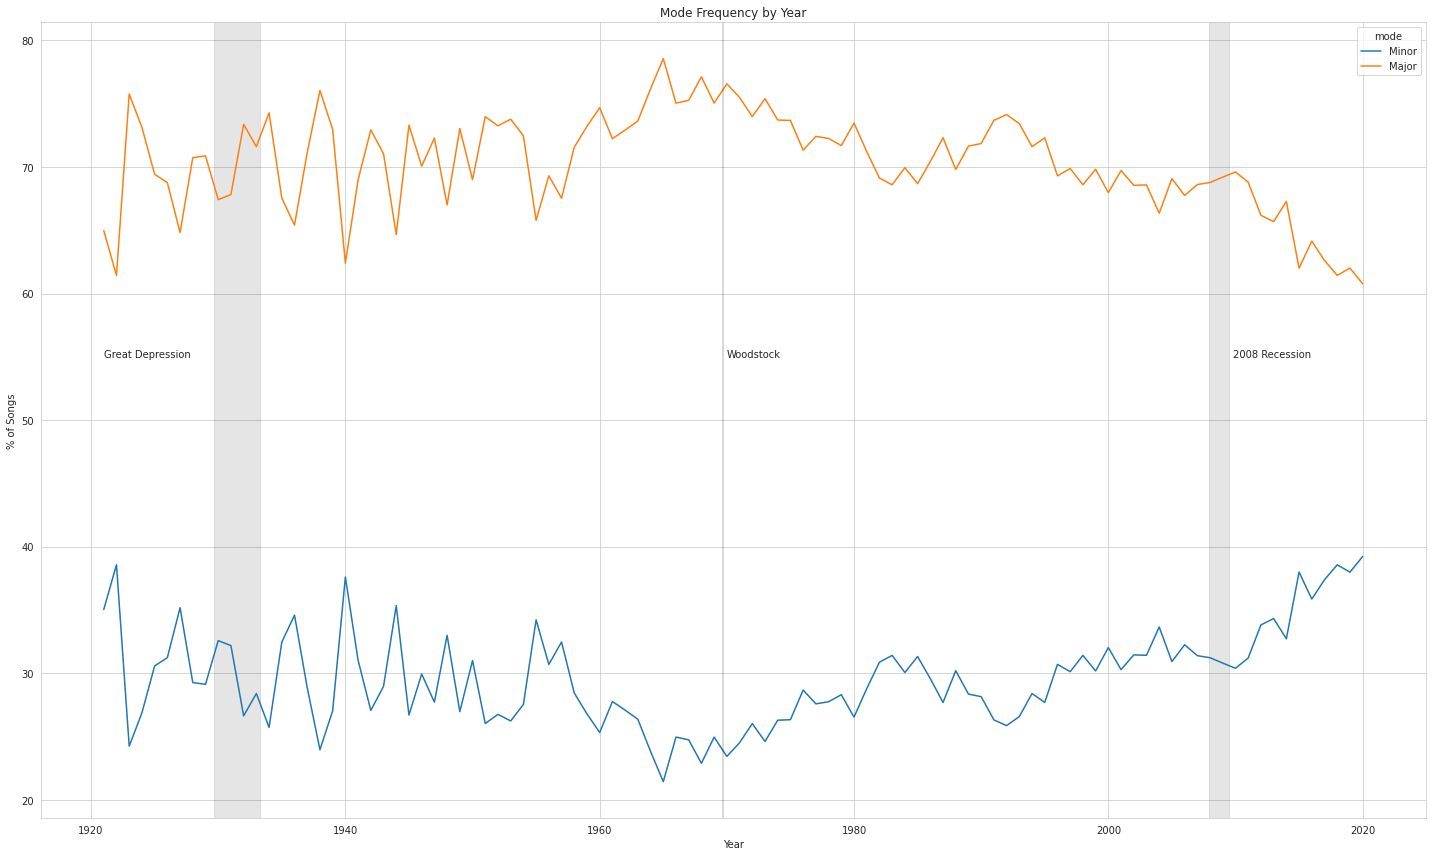

In [ ]:
mode_freq_by_year_df = spark.sql('''SELECT year, mode, COUNT(mode) AS frequency FROM cleaned_data GROUP BY year, mode
                                  ORDER BY year ASC, mode ASC''').toPandas()

# Map out our values
mode_freq_by_year_df['mode'] = mode_freq_by_year_df['mode'].apply(lambda x: "Minor" if x == 0 else "Major")
mode_freq_by_year_df['frequency'] = mode_freq_by_year_df.apply(lambda x: 100 * x['frequency'] / 
                                                               yearly_track_count.get(x['year']).get('number_of_tracks'), axis=1)

# Plot
fig = plt.figure(figsize=(20, 12))
mode_freq_plot = sb.lineplot(data=mode_freq_by_year_df, x="year", y="frequency", hue="mode")
mode_freq_plot.set_title("Mode Frequency by Year")
mode_freq_plot.set(xlabel='Year', ylabel='% of Songs')

# Label Woodstock Music Festival
plt.axvline(1969.7, color='black', alpha=0.2)
plt.text(1970, 55, 'Woodstock')
# Label major U.S. economic recessions/depressions
plt.axvspan(2007.95, 2009.5, color='black', alpha=0.1)
plt.text(2009.8, 55, '2008 Recession')
plt.axvspan(1929.7, 1933.25, color='black', alpha=0.1)
plt.text(1921, 55, 'Great Depression')

fig.tight_layout()

This graph is a lot easier to look at:
- It appears that the Major mode hit its peak popularity in the mid-1960s (right around the time of Woodstock, as well as the "Summer of Love" in June 1967)
- Songs become more Minor as we approach the current day; the Major-Minor ratio for 2020 is nearly 60:40, the smallest of any year from the data we've captured

In [ ]:
# The exact ratio for 2020
mode_freq_by_year_df.tail(2)

,year,mode,frequency
198,2020,Minor,39.224704
199,2020,Major,60.775296


- There isn't a particularly strong correlation, but it could be argued that economic downturns slightly increase the ratio of Major to Minor tracks released. People want something to cheer them up! Perhaps in a future iteration of this project, we could gather more samples from the early 20th Century to "smooth out" some of the jagged readings from that timeframe

Additionally, it's worth noting that Major and Minor are not the only two modes. The data we have has been simplified to label tracks as the mode to which they are closest, but there are actually many more "traditional" (Church) modes as well as many ways (particularly in pieces composed in the 20th Century) to go beyond the traditional notions of modality. This may skew the data we have, especially with genres such as jazz music, which frequently use Lydian, Mixolydian, and other modes. See the following links if you're curious about this!
- https://en.wikipedia.org/wiki/Mode_(music)
- https://en.wikipedia.org/wiki/Twelve-tone_technique
- https://en.wikipedia.org/wiki/Post-tonal_music_theory
- https://en.wikipedia.org/wiki/Mode_of_limited_transposition

#### 2.1.7: Tempo vs. Danceability

Let's wrap up this section by looking at danceability. After all, we all like to dance!

We think a clear partner to danceability should be tempo, so let's plot it and see if this intuition is well-founded. We also explored danceabiliy vs. some other metrics, but found similar or uninteresting results. We think this graph represents the same findings better than any others.

In [ ]:
# Pull data we need and scale danceability so it's easier to view
tempo_dance_df = cleaned_data_df[["tempo", "danceability"]].copy()
tempo_dance_df["danceability"] = tempo_dance_df["danceability"].apply(lambda x : x*100)

A heatmap (of sorts) might be the best method here. We'll only show Tempo values between 20 and 250 since those are the lower and upper limits of our data. This is likely because any track with a very slow or fast tempo would likely be categorized as having a tempo of some multiple or factor of itself (e.g., 240bpm and 30bpm could both be categorized as 120bpm depending on the method used).

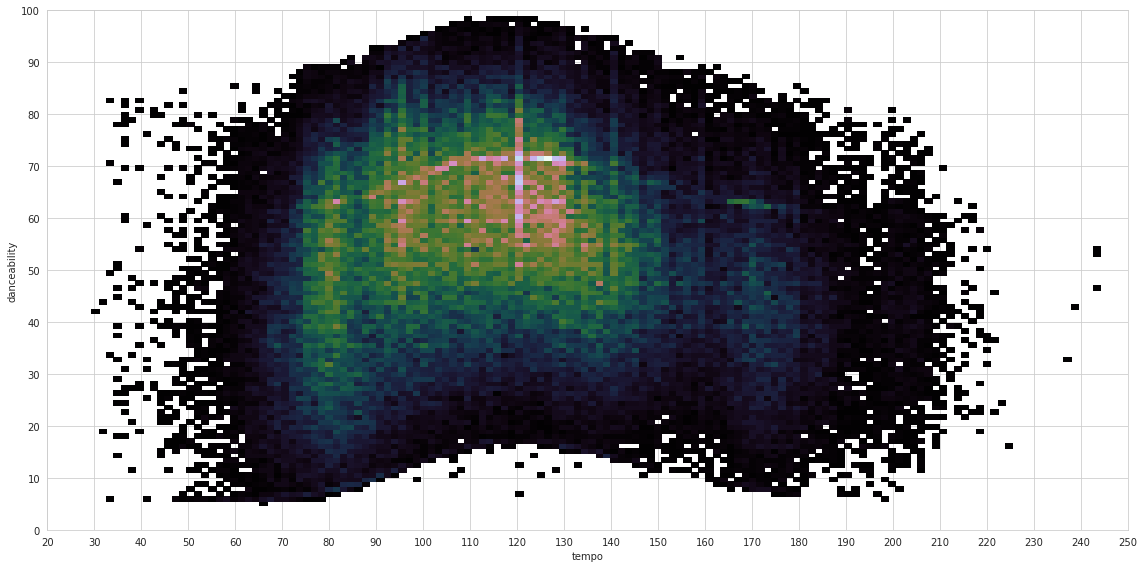

In [ ]:
fig = plt.figure(figsize=(16, 8))

g = sb.histplot(x=tempo_dance_df["tempo"], y=tempo_dance_df["danceability"], cmap='cubehelix')
g.set(xticks=np.arange(20, 260, 10), yticks=np.arange(0, 101, 10))
g.set_xlim(20, 250)
g.set_ylim(0, 100)
fig.tight_layout()

We can see from this that there is a notable increase in danceability around tempi of 120bpm, both in the floor and ceiling of our values. This does suggest a sweet spot in danceable songs. Let's get a few examples.

In [ ]:
danceable_df = cleaned_data_df[(cleaned_data_df['danceability'] > 0.7) & (cleaned_data_df['tempo'] > 118) & 
                               (cleaned_data_df['tempo'] < 124)][['artists', 'name', 'danceability', 'tempo']]
danceable_df.sort_values(by='danceability', ascending=False).head()

,artists,name,danceability,tempo
id,,,,
4VaaOmXkODToDiKTL3doab,Spoon,Stay Don't Go,0.985,119.751
2CwGWqDUOImtIn1vUl4i3r,Run–D.M.C.,Wake Up,0.982,119.659
4ZdjCuiWBv2weLftWPJ72c,Daft Punk,Teachers,0.980,123.206
1sLTxLJzyoBJiPzv420KAx,"The Jacksons, Mick Jagger",State of Shock,0.980,121.562
5UJ3N25ukIruG4Do8RDHra,XXXTENTACION,UP LIKE AN INSOMNIAC - Freestyle,0.979,120.002


Purely for science, take a moment to confirm that these are danceable!
- Spoon: ["Stay Don't Go"](https://www.youtube.com/watch?v=K7SENr7EGDE)
- Run-D.M.C.: ["Wake Up"](https://www.youtube.com/watch?v=44ksjkEMABs)
- Daft Punk: ["Teachers"](https://www.youtube.com/watch?v=3yq-NFiEywo)

### 2.2: Single-Artist Tracks

It's time to revisit our single artist tracks and perform a few more analyses with them.

In [ ]:
# Load our data
single_artist_w_ages_df = pd.read_csv("https://raw.githubusercontent.com/a-binkley/SpotifyMLProject/main/single_artist_w_ages_linked.csv", error_bad_lines=False)
single_artist_w_ages_df.drop(columns=['Unnamed: 0'], inplace=True)
single_artist_w_ages_sdf = spark.createDataFrame(single_artist_w_ages_df)
single_artist_w_ages_sdf.createOrReplaceTempView('single_artist_w_ages')

print("Found {} entries with ages".format(len(single_artist_w_ages_df)))

Found 90854 entries with ages


#### 2.2.1: Age Distribution

First, let's look at our age distribution to see if we need to remove any bizarre (or highly unlikely) values from the edges of our age range.

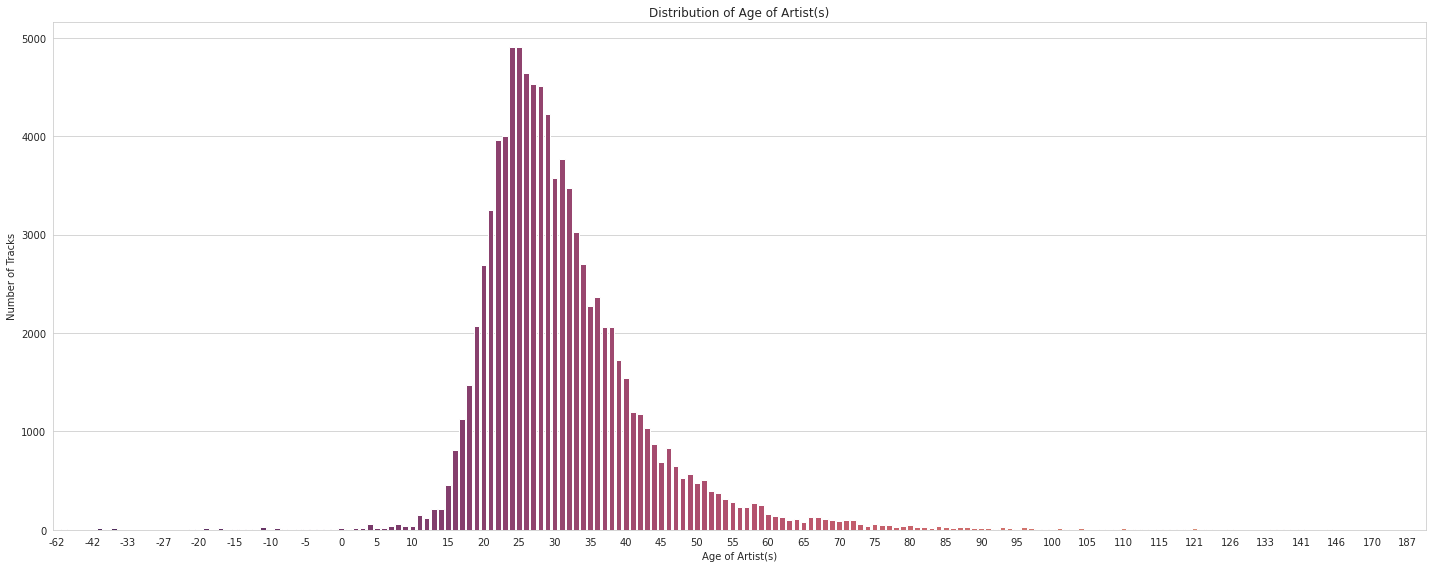

In [ ]:
artist_age_distrib_df = spark.sql('''SELECT COUNT(name) AS numTracks, age_at_release AS age FROM single_artist_w_ages 
                                  GROUP BY age_at_release ORDER BY age ASC''').toPandas()
                                  
fig = plt.figure(figsize=(20, 8))
g = sb.barplot(x=artist_age_distrib_df['age'], y=artist_age_distrib_df['numTracks'], palette="flare_r")
g.set_title("Distribution of Age of Artist(s)")
g.set_xlabel("Age of Artist(s)")
for index, label in enumerate(g.xaxis.get_ticklabels()):
  label.set_visible(False if index % 5 != 0 else True)
g.set_ylabel("Number of Tracks")

fig.tight_layout()

We'll want to make cut-off points for both the lower and upper bound of the age range. Let's keep entries between 14 and 80, inclusive.

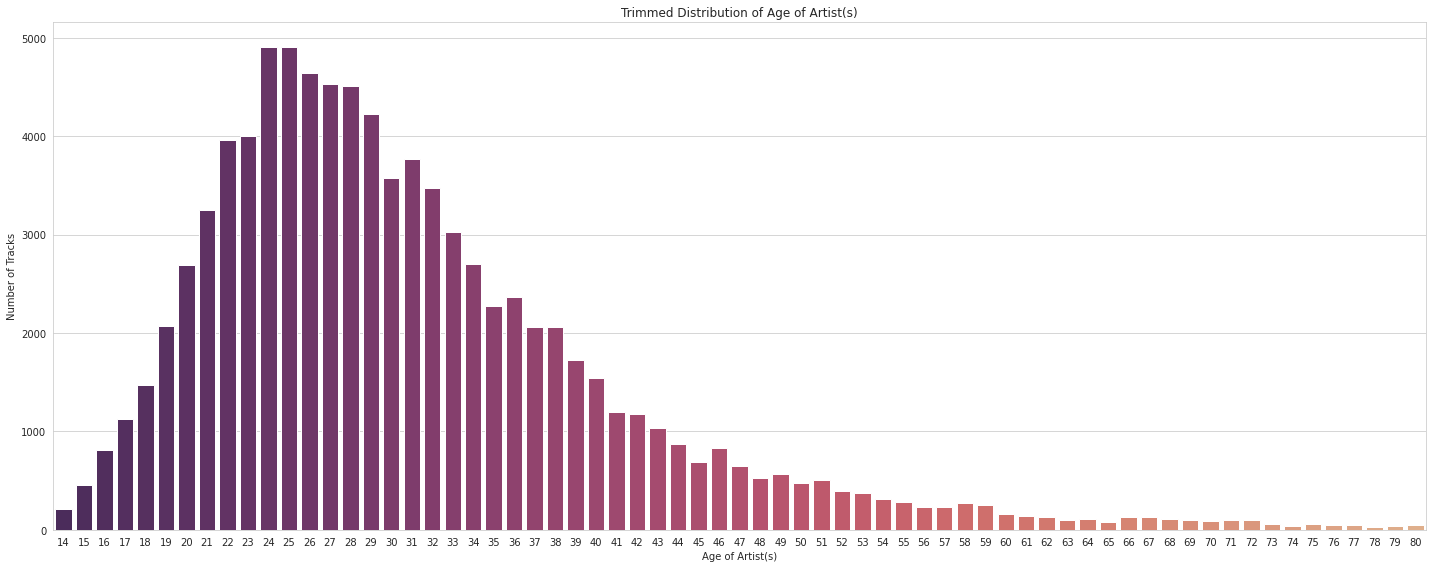

In [ ]:
# Create a new dataframe to represent the changes
single_artist_w_ages_cleaned_df = single_artist_w_ages_df[(single_artist_w_ages_df['age_at_release'] > 13) & 
                                                          (single_artist_w_ages_df['age_at_release'] < 81)]

artist_age_distrib_df = spark.sql('''SELECT COUNT(name) AS numTracks, age_at_release AS age FROM single_artist_w_ages 
                                  WHERE age_at_release > 13 AND age_at_release < 81
                                  GROUP BY age_at_release ORDER BY age ASC''').toPandas()

fig = plt.figure(figsize=(20, 8))
g = sb.barplot(x=artist_age_distrib_df['age'], y=artist_age_distrib_df['numTracks'], palette="flare_r")
g.set_title("Trimmed Distribution of Age of Artist(s)")
g.set_xlabel("Age of Artist(s)")
g.set_ylabel("Number of Tracks")

fig.tight_layout()

This distribution makes sense: a bell curve centered on artists in their mid-late 20s. However, how much of the data did we lose?

In [ ]:
num_dropped = len(single_artist_w_ages_df) - len(single_artist_w_ages_cleaned_df)
print('''Filtered down to {} entries (removed {} entries outside the desired age window - a total loss of {}%)'''.format(
            len(single_artist_w_ages_cleaned_df), num_dropped, round(100 * (num_dropped / len(single_artist_w_ages_df)), 2)))

Filtered down to 89134 entries (removed 1720 entries outside the desired age window - a total loss of 1.89%)


#### 2.2.2: Number of Artists vs. Average Popularity

Alright, now for the big question. Is there a correlation between the number of artists and the popularity of a song? If so, should we consider including this information as a feature in our ML models?


This should be fairly simple to visualize, and we can do so with a boxplot. First, recall the plot in Section 2.1.1. From that, we can see that if we want to make our boxplot a bit more reliable, we should only look at tracks that have 16 or fewer artists - we don't want rogue values for higher artist counts throwing off our data, and we only have 24 total entries above that threshold, giving only a tiny loss of data (0.015%).

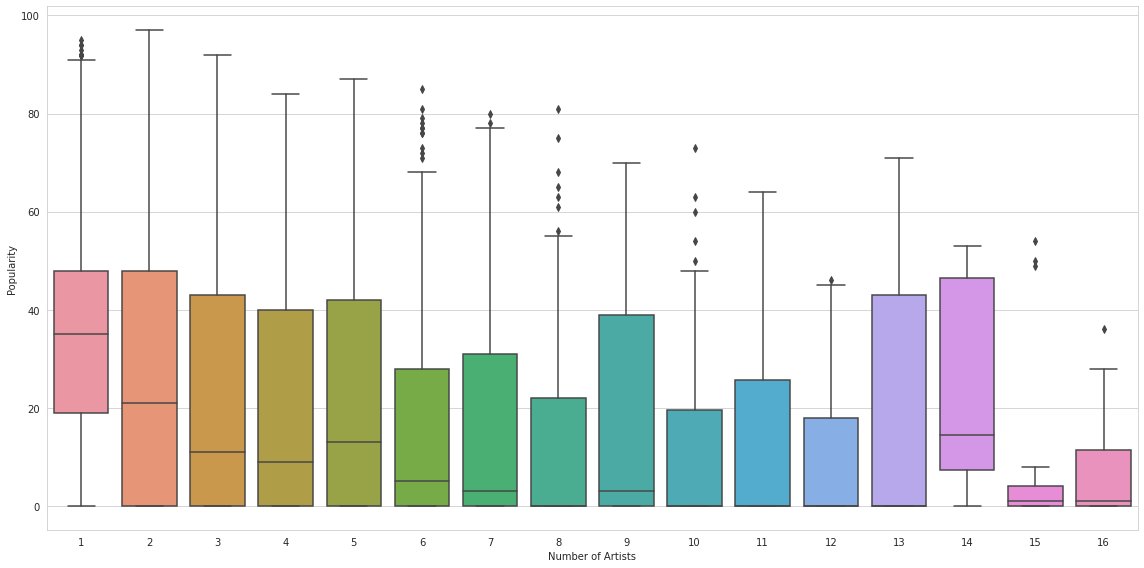

In [ ]:
limited_artists_df = cleaned_data_df[cleaned_data_df['numArtists'] < 17][['numArtists', 'popularity']]

fig = plt.figure(figsize=(16, 8))
g = sb.boxplot(x='numArtists', y='popularity', data=limited_artists_df)
g.set_xlabel('Number of Artists')
g.set_ylabel('Popularity')

fig.tight_layout()

It actually appears that we have a slight *decrease* in popularity as we add more artists to a track. Perhaps this doesn't accurately capture the popularity of collaboration, per se, but still it shows that songs with only a single artist tend to be more popular than songs with more artists. Interestingly, once we get above 2 artists, the tracks with an odd number of artists tend to be noticeably more popular than tracks with an even number of artists. We would need to find out *why* that was the case to understand it fully, it could just be coincidence. 

Either way, we can conclude that number of artists is not a driving factor in the success and popularity of songs or bands.

#### 2.2.3: Age Correlation Matrix

Let's see how our new metric compares with its pre-existing siblings

In [ ]:
age_correlation_matrix = single_artist_w_ages_cleaned_df.corr()
age_correlation_matrix.style.background_gradient()

,age_at_release,popularity,duration_ms,danceability,energy,explicit,instrumentalness,key,mode,liveness,loudness,acousticness,speechiness,tempo,valence,year,num_duplicates
age_at_release,1.000000,-0.050968,0.030296,-0.015855,-0.183422,-0.104872,0.072617,-0.007877,0.030835,0.002638,-0.162417,0.195797,0.015045,-0.055201,-0.025348,0.011506,-0.063691
popularity,-0.050968,1.000000,0.089253,0.119829,0.407019,0.250274,-0.241312,0.007346,-0.032699,-0.066370,0.430410,-0.519329,-0.047654,0.099585,-0.079850,0.825623,0.069026
duration_ms,0.030296,0.089253,1.000000,-0.078222,0.072432,-0.010829,0.040352,0.008166,-0.069478,0.087651,0.017991,-0.136090,0.011696,-0.009758,-0.161618,0.106460,0.005872
danceability,-0.015855,0.119829,-0.078222,1.000000,0.083084,0.165151,-0.151976,0.016036,-0.039783,-0.133575,0.134578,-0.115279,0.158210,-0.098311,0.526778,0.100557,0.039496
energy,-0.183422,0.407019,0.072432,0.083084,1.000000,0.168001,-0.188998,0.029521,-0.039420,0.157245,0.773995,-0.752454,0.069429,0.234469,0.295049,0.475652,0.024017
explicit,-0.104872,0.250274,-0.010829,0.165151,0.168001,1.000000,-0.086688,0.016520,-0.076643,0.031839,0.194182,-0.191921,0.312419,0.010013,-0.049700,0.303172,-0.006486
instrumentalness,0.072617,-0.241312,0.040352,-0.151976,-0.188998,-0.086688,1.000000,-0.006617,-0.053372,-0.034437,-0.320303,0.227769,-0.061345,-0.059967,-0.114731,-0.230634,-0.035887
key,-0.007877,0.007346,0.008166,0.016036,0.029521,0.016520,-0.006617,1.000000,-0.116936,0.000629,0.018737,-0.022829,0.031992,0.004467,0.018621,0.014451,-0.004678
mode,0.030835,-0.032699,-0.069478,-0.039783,-0.039420,-0.076643,-0.053372,-0.116936,1.000000,0.010808,-0.012178,0.042107,-0.060913,0.011833,0.017932,-0.034909,-0.019102
liveness,0.002638,-0.066370,0.087651,-0.133575,0.157245,0.031839,-0.034437,0.000629,0.010808,1.000000,0.066098,-0.039554,0.181379,0.016249,-0.014900,-0.033097,-0.016621


It looks like it doesn't have any particularly significant positive or negative correlations with our other features.

### 2.3: Genres

Alright, let's change our tune here. One major metric we have not looked at so far is genre. We want to explore the different genres there are, if there are any overall preferred genres, how they correlate to popularity, and how they have changed over time. 

One issue with our data is that genre is not included in the main data set, so we need to stitch two sets together. Genre (we found) is also highly variable in definition. We have defined our own set of basic genres here, but tried to follow the definition listed [here](https://en.wikipedia.org/wiki/Music_genre).

In [ ]:
# Do some saving of data for use below. 
indexed_data_sdf = spark.createDataFrame(cleaned_data_df.copy().reset_index())
indexed_data_sdf.createOrReplaceTempView('indexed')

#### 2.3.1: Data normalization

We need to do some data cleaning and normalization with the genres given. It's easier to do this by artist since we can ignore most of the dataframe. To get a workable set of genres we need to:
- Normalize the genres (we're given a list, but only want one genre per track)
- Join genres with song data

We've attempted to skew the data as little as possible by putting unknown or not given genres in a section labeled 'other'. It likely wouldn't be feasible to scrape the web and fill in missing genre gaps since there are so many different definitions of standard genres - for example, the ones we're using are Wikipedia's definition of genres. Our data starts with over 3000 unique genres, so we have to simplify a bit.

So how do we do this? We decided to create our own algorithm. The idea is fairly simple: for each artist, we get all the unique genres listed, phrase search them for any of our basic genres, and tally up all occurrences. We then choose the most frequent genre or default to 'other' if the list is empty or full of unknown genres.

In [ ]:
import operator

normalized_genres_df = data_with_genres_df[['artists', 'genres']].copy()

'''
Input: artist -> genre list
Tally up occurences of each genre in a list and use the largest result, break ties arbitrarily.
'''
def normalize_genre(x):
  basic_genres={"blues": 0, "classical": 0, "country": 0, "electronic": 0, "folk": 0, "jazz": 0, "reggae": 0, 
                "religious": 0, "rock": 0, "rap": 0, "metal": 0, "traditional": 0, "r&b": 0, "indie": 0, 
                "soul": 0, "hip hop": 0, "pop": 0, "show tunes": 0, "other": 0}
  for basic_genre in basic_genres:
    given_genres = x
    # turn the string version of a list (why?) into an actual list so we can iterate
    given_genres = given_genres.replace("[", "").replace("]", "").replace("'", "").split(",")
    given_genres = [i for i in given_genres if i]
    if not given_genres:
      basic_genres['other'] += 1
      break
    else:
      for genre in given_genres:
        if basic_genre.lower() in genre.lower():
          basic_genres[basic_genre] += 1
  normal_genre = max(basic_genres.items(), key=operator.itemgetter(1))[0]
  # This takes care of the case where there were genres in the list, but we just didn't recognize any. Default to other.
  if (basic_genres[normal_genre] == 0):
    normal_genre = 'other';
  x = normal_genre
  return x

# Normalize the genres
normalized_genres_df['genres'] = normalized_genres_df['genres'].apply(normalize_genre)
genre_data_sdf = spark.createDataFrame(normalized_genres_df)
genre_data_sdf.createOrReplaceTempView('genres')

# Re-join the results with our other features
final_genres_df = spark.sql("SELECT M.*, G.genres FROM indexed M LEFT JOIN genres G ON M.artists = G.artists").toPandas().set_index('id')
print('Found {} entries with linkable genre'.format(len(final_genres_df)))

Found 156607 entries with linkable genre


Let's save final_genres as a Spark dataframe for easy queries. We'll reset the index because we don't want to lose the 'id' attribute, but we can rebuild this later if need be.

In [ ]:
final_genres_sdf = spark.createDataFrame(final_genres_df.reset_index())
final_genres_sdf.createOrReplaceTempView('final_genres')

Now some analysis on this: first, let's look at the distribution of genres in our songs list. This will also help determine if there were any significant errors in the preceding steps.


In [ ]:
genre_dist_df = spark.sql('''SELECT genres, count(genres) AS num_songs from (SELECT * FROM final_genres WHERE genres IS NOT NULL) 
                            GROUP BY genres ORDER BY num_songs DESC''').toPandas()
genres_dist_sdf = spark.createDataFrame(genre_dist_df)
genres_dist_sdf.createOrReplaceTempView('genres_dist')
genre_dist_df

,genres,num_songs
0,rock,33779
1,other,30717
2,pop,13672
3,jazz,11491
4,country,6266
5,folk,5404
6,rap,4446
7,soul,4407
8,metal,3334
9,blues,2427


It looks like the distribution is ok. Rock and pop are higher up, as we expected. We also expected 'other' to be high due to the variance in defining genre. We can ignore 'other', or we can use it to represent a large group. Otherwise, the algorithm seemed to capture the data fairly well.

#### 2.3.2: Number of Songs by Genre

Let's visualize the data above by sorting our genres by number of songs in each.

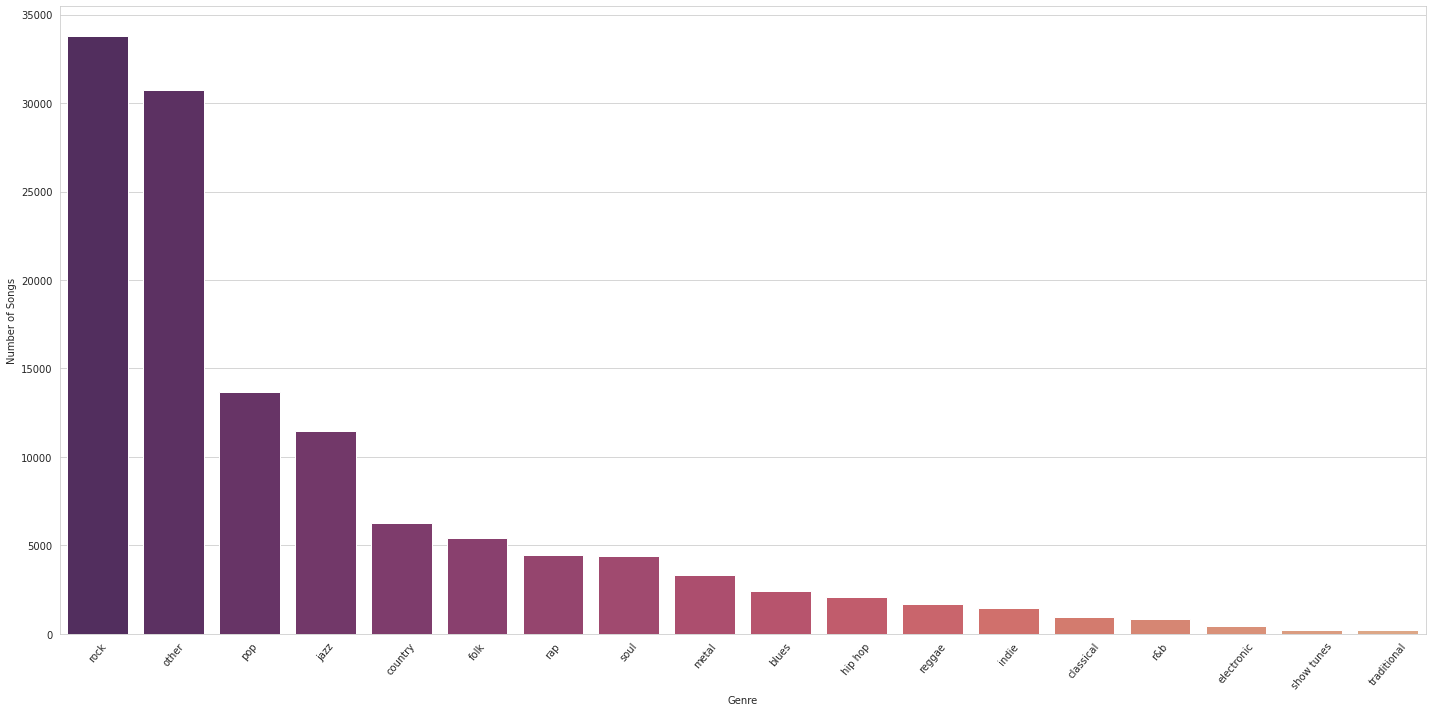

In [ ]:
fig = plt.figure(figsize=(20, 10))
g = sb.barplot(x='genres', y = 'num_songs', data=genre_dist_df, palette="flare_r")
g.set_xticklabels(g.get_xticklabels(), rotation=50)
g.set_xlabel('Genre')
g.set_ylabel('Number of Songs')

fig.tight_layout()

#### 2.3.3: Popularity by Genre

Now let's see if the genre makes a difference in a song's overall popularity. We predict that it should make at least a small difference.

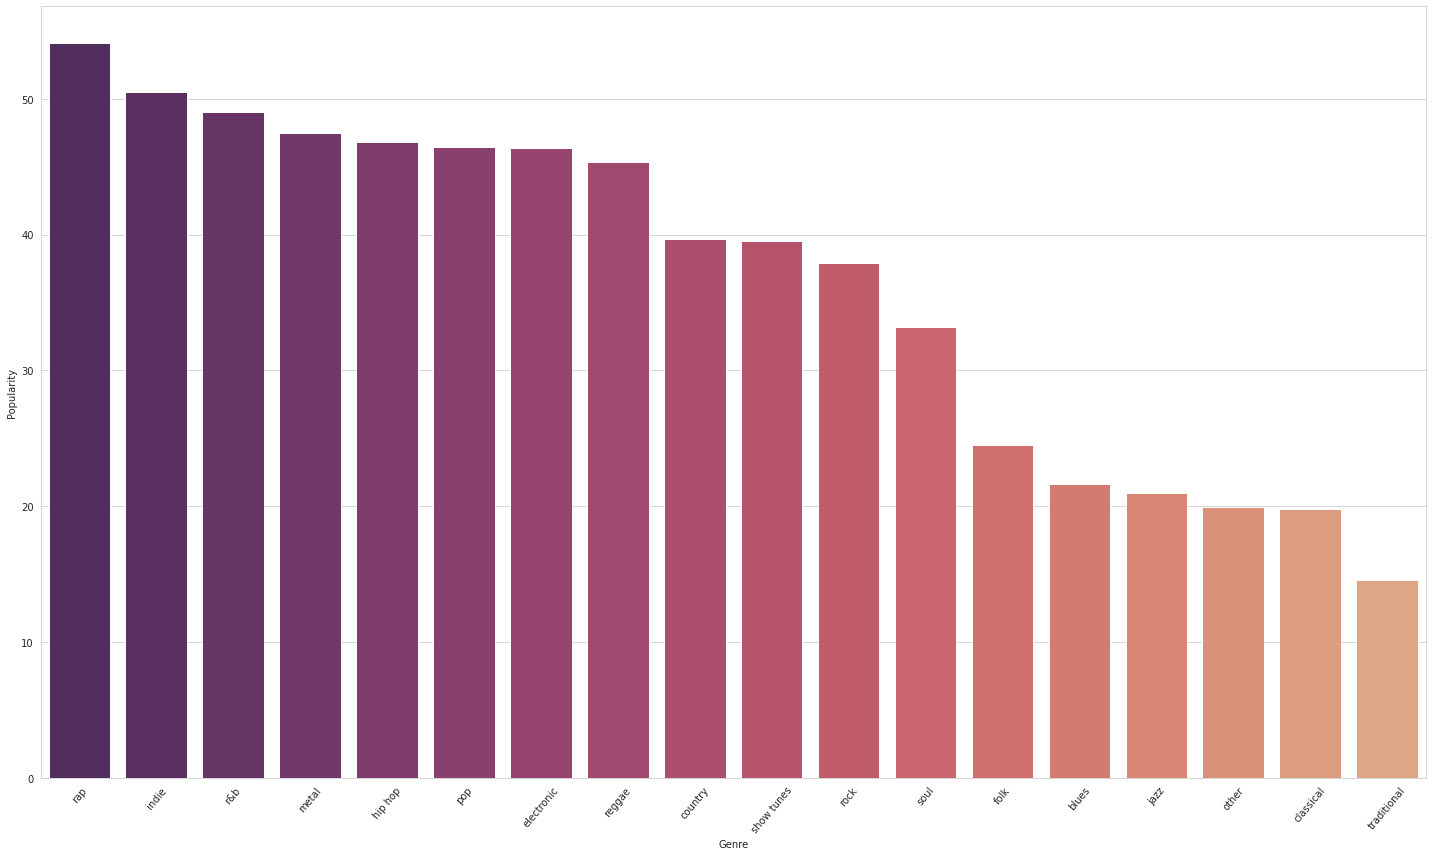

In [ ]:
pop_vs_genre = spark.sql('''SELECT AVG(popularity) AS popularity, genres FROM (SELECT * FROM final_genres WHERE genres IS NOT NULL) 
                            GROUP BY genres ORDER BY popularity DESC''').toPandas()

# Filter out '0' values since they are invalid
pop_vs_genre = pop_vs_genre[pop_vs_genre["popularity"] > 0]

# Plot distribution
fig = plt.figure(figsize=(20,12))
g = sb.barplot(x = 'genres', y = 'popularity', data=pop_vs_genre, palette="flare_r")
g.set_xticklabels(g.get_xticklabels(), rotation=50)
g.set_xlabel('Genre')
g.set_ylabel('Popularity')
fig.tight_layout()

This is interesting. We saw in the previous graph that there was a large difference in the number of songs for a genre like rock when compared to rap. However, this graph shows us that the popularity is not actually the same. Let's visualize this better to see if we can get a handle on it.

#### 2.3.4: Genre Popularity vs. Number of Songs

Now we'll combine the above results to see how well each genre does with regard to its song count in an attempt to better understand the findings above. We can pull all the data together with a single join and aggregation.

In [ ]:
combined_data = spark.sql('''SELECT A.genres, AVG(A.popularity) AS popularity, MAX(B.num_songs) AS num_songs 
                            FROM (SELECT * FROM final_genres WHERE genres IS NOT NULL AND popularity > 0) A 
                            JOIN genres_dist B ON A.genres = B.genres GROUP BY A.genres ORDER BY genres''').toPandas()

# Create a metric we can use to accurately compare genre song count and popularity
combined_data['num_songs_scaled'] = combined_data['num_songs'].apply(lambda x: x / 33779)
combined_data['popularity_scaled'] = combined_data.apply(lambda x: (x['popularity'] / 54.173649) - x['num_songs_scaled'], axis=1)

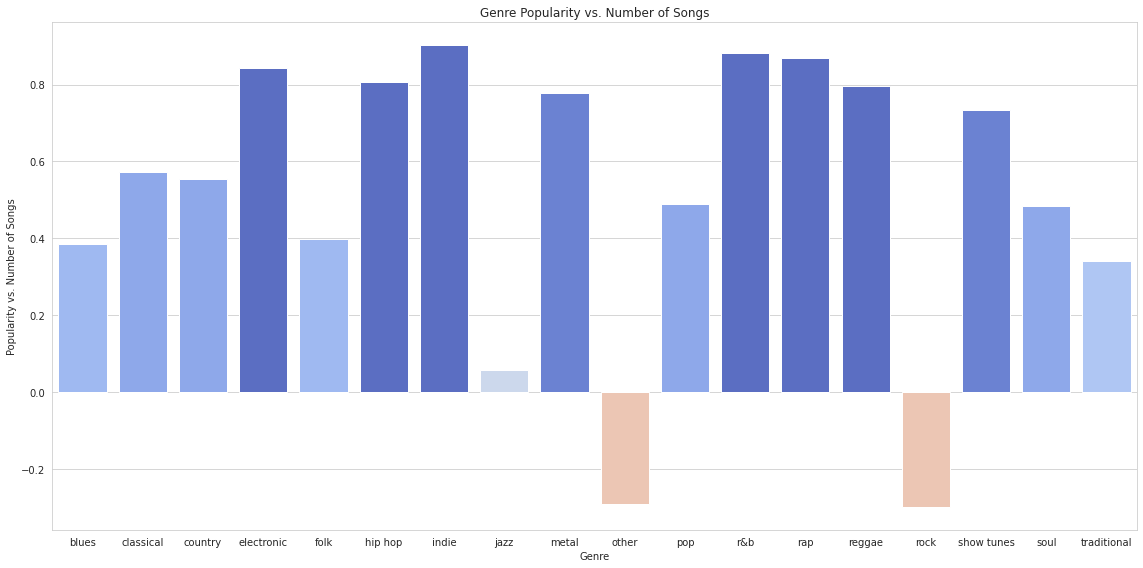

In [ ]:
# Set up a y-axis-value-based color palette
pop_scaled = combined_data['popularity_scaled']
bar_rank = [int((max(pop_scaled) - i) * len(combined_data) / 
                (max(pop_scaled) + 1)) for i in pop_scaled] 
pal = sb.color_palette('coolwarm_r', len(combined_data))

# Make the plot
fig = plt.figure(figsize=(16, 8))
g = sb.barplot(x='genres', y='popularity_scaled', data=combined_data, palette=np.array(pal[::-1])[bar_rank])
g.set_title('Genre Popularity vs. Number of Songs')
g.set_ylabel('Popularity vs. Number of Songs')
g.set_xlabel('Genre')
fig.tight_layout()

From this, we can see that genres such as 'indie', 'r&b', and 'rap' punch significantly above their weight, so to speak. Positive values signal that a genre is more popular with regard to the number of songs linked to it, while negative values mean that there are a high number of songs in that genre compared to how popular the genre is overall.

We expect 'other' to be negative since it encapsulates unknown or not given genres. However, having 'rock' negative is a very suprising result. Rock has been a staple genre almost entirely across our data set and have the greatest number of overall songs. This actually might be the factor that is causing the negative values. Almost like a dampening effect. 

It is also interesting at how well 'rap' and 'hip-hop' perform. It is our thinking that this can be attributed to the fact that they are relatively new genres, but have exploded in popularity over the last few decades. 

#### 2.3.5: Genre Popularity by Decade

The above findings make us curious. What is the overall trend (if any) in genre over our dataset? We think looking at a year-by-year basis will be too granular, so let's generalize to the decade level. 

First, we need to connect each year to its corresponding decade. We do this in the intuitive way of taking the floor of the decade - i.e., if the year of the song is 1999, the corresponding decade will be 1990.

In [ ]:
final_genres_df['decade'] = final_genres_df['year'].apply(lambda x: x-(x%10))
decades_sdf = spark.createDataFrame(final_genres_df.reset_index())
decades_sdf.createOrReplaceTempView('decades')

final_genres_df.head()

,acousticness,artists,numArtists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year,num_duplicates,genres,decade
id,,,,,,,,,,,,,,,,,,,,,,
72otaqywVqwyXaCjk75JKm,0.4375,*NSYNC,1,0.5275,242500,0.531,0,0.000000,10,0.2015,-8.3090,1,(God Must Have Spent) A Little More Time On Yo...,51,1998-11-13,0.03875,126.011,0.2975,1998,2,pop,1990
5YTMRAT4yKgFrepF8Hi3mY,0.0623,*NSYNC,1,0.7560,200947,0.938,0,0.000309,8,0.3630,-2.6845,0,I Want You Back - Radio Edit,53,1997-05-26,0.04140,112.042,0.8590,1997,2,pop,1990
4v9WbaxW8HdjqfUiWYWsII,0.1030,*NSYNC,1,0.6420,255307,0.939,0,0.000000,5,0.8810,-3.9670,1,"Merry Christmas, Happy Holidays",39,1998-10-30,0.04630,105.003,0.7560,1998,1,pop,1990
5oKqhBnIUcqfluUVvUbJ7U,0.0317,*NSYNC,1,0.4260,277640,0.714,0,0.000302,9,0.3620,-5.0900,1,Sailing,40,1997-05-26,0.03140,75.030,0.2130,1997,1,pop,1990
0MxKHJEhhFOJsvYak4Q5Bu,0.0494,*NSYNC,1,0.4920,210333,0.973,0,0.077800,4,0.3350,-4.6180,1,Bringin' Da Noise,39,2000-03-21,0.04240,113.415,0.8650,2000,1,pop,2000


Next, we need to perform a double aggregate to group each song by genre and then by year. This will give us the average data for each genre class, for each corresponding decade. 

In [ ]:
genre_by_decade = spark.sql('''SELECT decade, genres, AVG(popularity) as avg_popularity 
                              FROM decades WHERE genres IS NOT NULL GROUP BY decade, genres 
                              ORDER BY decade, genres''').toPandas()

Now let's plot it!

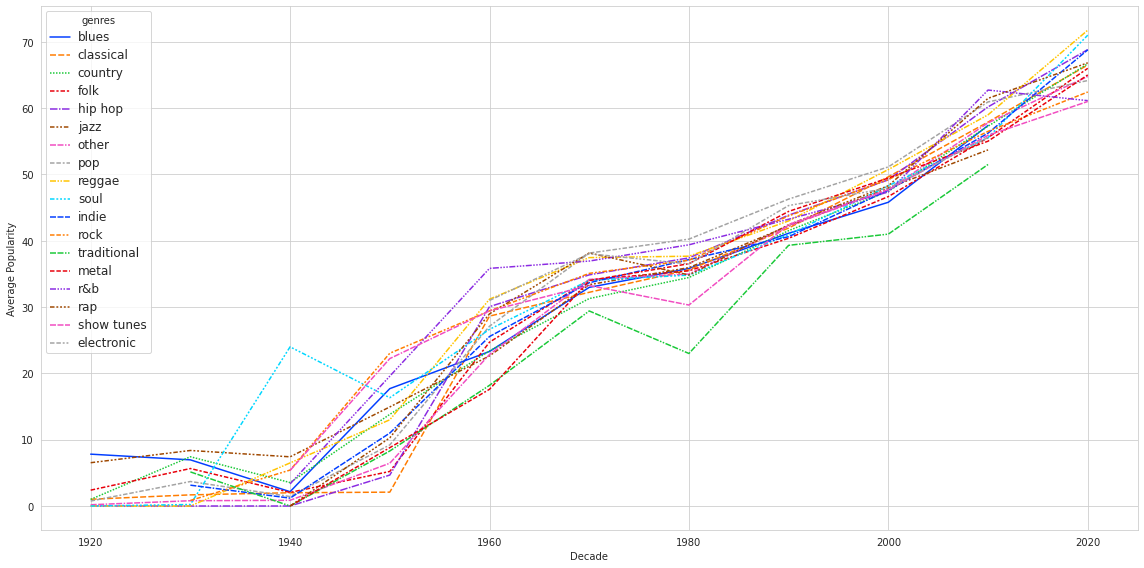

In [ ]:
fig = plt.figure(figsize=(16,8))

g = sb.lineplot(x = 'decade', y = 'avg_popularity', hue='genres', data=genre_by_decade, palette='bright', style='genres')
plt.setp(g.get_legend().get_texts(), fontsize='12')
g.set(ylabel='Average Popularity', xlabel='Decade')
fig.tight_layout()

This graph is not at all what we expected originally. Our thought was that we would see a decrease in many genres and a large increase in others. To formalize this, we expected to see a graph that represented more of a parabola, with the vertex being somewhere in the middle, i.e. 1970. Instead, we see an almost parallel group of lines, with each genre still having obvious differences, peaks, and valleys, but the overall trend upwards of popularity across all genres. 

Why? We thought about this and have come up with a hypothesis: we think this graph shows us something about 'music' popularity in a general case and moves beyond the idea of genre popularity. To formalize, we think what we are seeing is a result of factors that make music more accessible, more a part of our everyday life, and more numerous in options available. Let's think about this in terms of a comparison: in the early 1900s how did one listen to music? Well, there was the radio and maybe a record player in a household... and that's about it. What about in the past 2 decades? We have the iPhone, iPod, YouTube, Spotify, radio, etc. 

# Section 3: Modeling with Linear Regression

We've learned a lot about the data, music, and what could potentially make a song popular. Let's take our data and do some Machine Learning with it. We will use SciKit-Learn for our models and will explore a few different models to compare results.

While 'age_at_release' truncates too much data for ML modeling, we include our newly linked 'genre' feature since it's more broadly applicable. 

## 3.1: Dimensionality Reduction with PCA

In [ ]:
# import ML tools
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler

We'll use final_genres_df and single_artists_w_ages_df, as the former essentially captures the values from cleaned_data_df with added genres and the latter gives the additional column 'age_at_release' to feed into another version of our model (to compare later). First, re-format final_genres_df to prepare for modeling (transform 'id' and 'genres', drop 'release_date', 'decade', 'artists', 'name', and 'num_duplicates'). The data in 'release_date'/'decade' is mostly captured by 'year', 'num_duplicates' is no longer needed or important, and 'artists' and 'name' are too large to one-hot-encode, so we'll drop them altogether. We can re-link them later by song id if we need to.

In [ ]:
model_input_df = final_genres_df.sort_index()
model_input_df.drop(columns=['release_date', 'num_duplicates', 'artists', 'name', 'decade'], inplace=True) 

# Transform non-numeric columns
id_list = final_genres_df.index.to_list()
id_list.sort()
model_input_df.reset_index(inplace=True, drop=True)

Plot one last correlation matrix before we feed into models

In [ ]:
model_correlation_matrix = model_input_df.corr()
model_correlation_matrix.style.background_gradient()

,acousticness,numArtists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
acousticness,1.000000,0.201662,-0.262985,-0.078299,-0.748159,-0.258578,0.329080,-0.022317,-0.023702,-0.562743,0.047514,-0.593768,-0.055354,-0.206111,-0.177373,-0.620118
numArtists,0.201662,1.000000,-0.130640,0.095854,-0.181822,0.034388,0.091618,-0.013044,0.029089,-0.178871,-0.003709,-0.152576,0.032606,-0.085821,-0.162348,-0.120737
danceability,-0.262985,-0.130640,1.000000,-0.135075,0.216586,0.247364,-0.278856,0.022842,-0.104936,0.291013,-0.046559,0.213054,0.230010,-0.002803,0.559327,0.193981
duration_ms,-0.078299,0.095854,-0.135075,1.000000,0.036692,-0.046909,0.083764,-0.001702,0.034586,-0.015454,-0.044914,0.066853,-0.059940,-0.028110,-0.197633,0.080113
energy,-0.748159,-0.181822,0.216586,0.036692,1.000000,0.141503,-0.281015,0.031117,0.126147,0.781371,-0.039349,0.496701,-0.053129,0.250789,0.344294,0.527496
explicit,-0.258578,0.034388,0.247364,-0.046909,0.141503,1.000000,-0.141595,0.006964,0.039495,0.150475,-0.082451,0.216056,0.414791,0.012612,-0.021581,0.245581
instrumentalness,0.329080,0.091618,-0.278856,0.083764,-0.281015,-0.141595,1.000000,-0.014971,-0.050061,-0.409009,-0.034667,-0.287826,-0.119094,-0.105887,-0.187998,-0.277529
key,-0.022317,-0.013044,0.022842,-0.001702,0.031117,0.006964,-0.014971,1.000000,-0.000136,0.022513,-0.113430,0.011210,0.015067,0.002970,0.029223,0.012657
liveness,-0.023702,0.029089,-0.104936,0.034586,0.126147,0.039495,-0.050061,-0.000136,1.000000,0.050970,0.005530,-0.078673,0.150044,0.006576,-0.000174,-0.058976
loudness,-0.562743,-0.178871,0.291013,-0.015454,0.781371,0.150475,-0.409009,0.022513,0.050970,1.000000,-0.012964,0.462928,-0.115877,0.212524,0.305504,0.483121


One-hot-encode the 'genres' column, add it to the input dataframe

In [ ]:
genres_one_hot_df = pd.get_dummies(model_input_df['genres'], dummy_na=True, sparse=True)
model_input_df = model_input_df.join(genres_one_hot_df)
model_input_df['popularity'] = model_input_df['popularity'].apply(lambda x: x / 100)
model_input_df.drop(columns='genres', inplace=True)
model_input_df.head()

,acousticness,numArtists,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year,blues,classical,country,electronic,folk,hip hop,indie,jazz,metal,other,pop,r&b,rap,reggae,rock,show tunes,soul,traditional,NaN
0,0.0131,1,0.2560,182347,0.895,0,0.000106,2,0.0821,-4.860,1,0.27,0.0707,191.307,0.5550,1978,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0.7950,1,0.6850,314667,0.483,0,0.878000,2,0.1130,-10.202,0,0.01,0.0337,97.694,0.8540,1954,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.6560,1,0.7880,179747,0.808,0,0.000000,5,0.1540,-6.590,1,0.00,0.0395,113.046,0.9690,1954,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,0.3020,2,0.0753,498560,0.150,0,0.884000,2,0.1210,-16.705,0,0.00,0.0371,76.558,0.0351,1951,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0.1960,1,0.7560,300600,0.470,0,0.000487,7,0.1260,-12.615,1,0.61,0.0394,120.484,0.4300,1989,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


The first thing we want to determine is whether PCA is needed. We determine this by breaking out data into labels and features, scaling the data for better learning, and plotting with PCA to see if we can find anything interesting in the explained variance ratio.

Create our training set, X, and our labels, y

In [ ]:
X = model_input_df.drop(['popularity'], axis=1)
y = model_input_df['popularity']

Standardize features (remove the mean and scale to unit variance)

In [ ]:
X = StandardScaler().fit_transform(X)

Split data into test set and train set (80:20 ratio)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Determine the optimal number of components for PCA

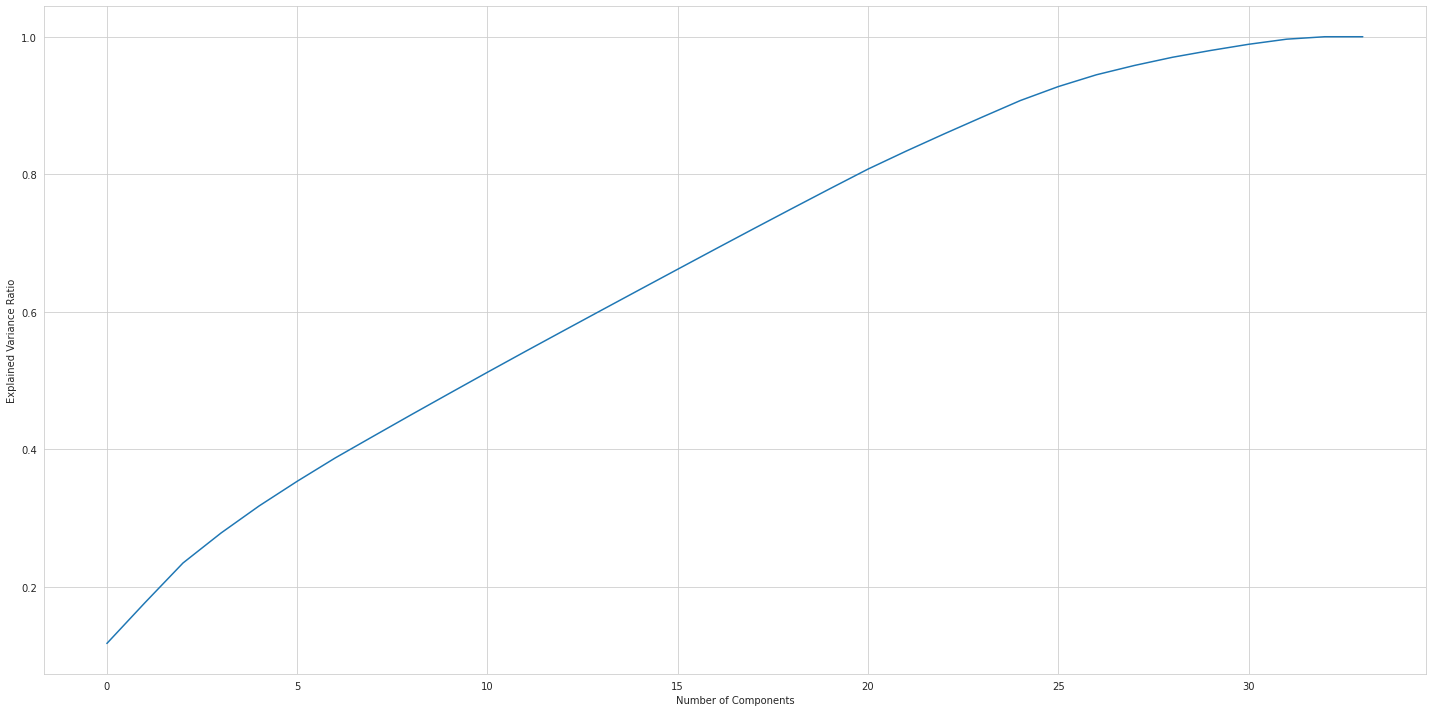

In [ ]:
pca = PCA().fit(x_train)
fig = plt.figure(figsize=(20,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
fig.tight_layout()

We'll choose the number of components for PCA automatically by setting a lower limit of 0.99 on the explained variance ratio and taking the lowest number of components that satisfies that condition.

In [ ]:
evr_cutoffs = pca.explained_variance_ratio_.cumsum().tolist()
num_components = [evr_cutoffs.index(i) for i in evr_cutoffs if i > 0.99][0]
print(num_components)

31


Based on this, it appears that we might not want to use PCA at all. The graph doesn't level off until immediately before the number of original components present in the dataset. However, let's compare results with and without it to determine which is ultimately better.

In [ ]:
pca = PCA(n_components=num_components)
x2_train = pca.fit_transform(x_train)
x2_test = pca.fit_transform(x_test)

## 3.2: Machine Learning

### 3.2.1: Comparing Models

There are a variety of options when using predictive modeling, so let's compare a few of them.

Linear Regression, with and without PCA applied

In [ ]:
# with PCA
LR_PCA_train = LinearRegression().fit(x2_train, y_train)
lr_pca_y_pred = LR_PCA_train.predict(x2_test)
lr_pca_mse = mean_squared_error(y_test, lr_pca_y_pred)
lr_pca_score = r2_score(y_test, lr_pca_y_pred)

In [ ]:
# without PCA
LR_train = LinearRegression().fit(x_train, y_train)
lr_y_pred = LR_train.predict(x_test)
lr_mse = mean_squared_error(y_test, lr_y_pred)
lr_score = r2_score(y_test, lr_y_pred)

Random Forest Regression, with and without PCA applied

Note that for Random Forest models, we need to tune our hyperparameters to get the best values we can. We have decided to save you the pain of running GridSearch in the below cell. As we all know, it takes a bit of time. Below is our searching log for those parameters:
- max_depth [100, 200, **300**], n_estimators [25, 50, **75**]
- max_depth [**250**, 350, 450], n_estimators [62, 100, **140**]
- max_depth [250, **260**, 270, 280, 290, 300], n_estimators [120, 150, **180**]
- max_depth [255, 260, **265**], n_estimators [165, 200, **230**]
- max_depth [**265**], n_estimators [220, 230, **240**]

In [ ]:
'''
param_grid = {
    'max_depth' : [265],
    'n_estimators' : [220, 230, 240]
}

gsrch = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid, cv=2)
gsrch.fit(x_train, y_train)
gsrch.best_params_
'''

"\nparam_grid = {\n    'max_depth' : [265],\n    'n_estimators' : [220, 230, 240]\n}\n\ngsrch = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid, cv=2)\ngsrch.fit(x_train, y_train)\ngsrch.best_params_\n"

The following two cells take a considerable amount of time to run due to the complexity of the model.

In [ ]:
# with PCA
rfr_pca = RandomForestRegressor(max_depth=265, n_estimators=240).fit(x2_train, y_train)
rf_pca_y_pred = rfr_pca.predict(x2_test)
rf_pca_mse = mean_squared_error(y_test, rf_pca_y_pred)
rf_pca_score = rfr_pca.score(x2_test, y_test)

In [ ]:
# without PCA
rfr = RandomForestRegressor(max_depth=265, n_estimators=240).fit(x_train, y_train)
rf_y_pred = rfr.predict(x_test)
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_score = rfr.score(x_test, y_test)

Which Regression model is best?

In [ ]:
mse_set = [lr_mse, lr_pca_mse, rf_mse, rf_pca_mse]
score_set = [lr_score, lr_pca_score, rf_score, rf_pca_score]
model_set = ['LR original', 'LR w/ PCA', 'RF original', 'RF w/ PCA']
best_mse = min(mse_set)
best_mse_model = model_set[mse_set.index(best_mse)]
best_score = max(score_set)
best_score_model = model_set[score_set.index(best_score)]

model_comparison_df = pd.DataFrame()
model_comparison_df.insert(0, 'model', model_set)
model_comparison_df.insert(1, 'mse', mse_set)
model_comparison_df.insert(2, 'score', [round(100 * i, 3) for i in score_set])
model_comparison_df = model_comparison_df.set_index('model').sort_values(by='score', ascending=False)

print('Best MSE is {}, from {}'.format(round(best_mse, 5), best_mse_model))
print('Best score is {}%, from {}'.format(round(100 * best_score, 2), best_score_model))

model_comparison_df

Best MSE is 0.00697, from RF original
Best score is 84.82%, from RF original


,mse,score
model,,
RF original,0.006969,84.818
LR original,0.008986,80.423
RF w/ PCA,0.010966,76.109
LR w/ PCA,0.013612,70.343


We can see from this that PCA both increases our MSE and decreases our r2 scores, even with a target explained variance ratio of 0.99. Therefore, we can see that the Random Forest model without PCA applied is both the highest scoring and least erroneous model. However, it's important to keep in mind that Random Forest models are limited by the fact that they <u> cannot extrapolate information outside the bounds of the inputs</u>. This means that if we added data with new values (e.g., 'year' > 2020, a new artist, a new track name, or a value for a feature such as 'energy' or 'duration_ms' that exceeds the limits of our current dataset), the model would quickly lose accuracy. Therefore in real-world situations and without the presence of a data streaming component in this project, it's likely a better choice to use the Linear Regression model (still without PCA). While the Linear Regression MSE and scores listed aren't as good as their Random Forest counterparts, they aren't significantly worse either. 

If we're going to use a Linear Regression model, we should ensure we don't overfit the data. Let's try out three regularization techniques to see how each affects the data:
- Lasso (L1)
- Ridge (L2)
- Elastic Net 

In [ ]:
from sklearn.linear_model import ElasticNet, Lasso, Ridge

In [ ]:
lasso = Lasso().fit(x_train, y_train)
lasso_y_pred = lasso.predict(x_test)
lasso_mse = mean_squared_error(y_test, lasso_y_pred)
lasso_score = lasso.score(x_train, y_train)

In [ ]:
ridge = Ridge().fit(x_train, y_train)
ridge_y_pred = ridge.predict(x_test)
ridge_mse = mean_squared_error(y_test, ridge_y_pred)
ridge_score = ridge.score(x_train, y_train)

In [ ]:
enr = ElasticNet(l1_ratio=0.001, tol=0.0005).fit(x_train, y_train)
enr_y_pred = enr.predict(x_test)
enr_mse = mean_squared_error(y_test, enr_y_pred)
enr_score = enr.score(x_test, y_test)

Which regularization is best?

In [ ]:
reg_mse_set = [lr_mse, lasso_mse, ridge_mse, enr_mse]
reg_score_set = [lr_score, lasso_score, ridge_score, enr_score]
model_set = ['LR original', 'LR w/ Lasso', 'LR w/ Ridge', 'LR w/ Elastic Net']
best_reg_mse = min(reg_mse_set)
best_reg_mse_model = model_set[reg_mse_set.index(best_reg_mse)]
best_reg_score = max(reg_score_set)
best_reg_score_model = model_set[reg_score_set.index(best_reg_score)]

model_comparison_df = pd.DataFrame()
model_comparison_df.insert(0, 'regularization', model_set)
model_comparison_df.insert(1, 'mse', reg_mse_set)
model_comparison_df.insert(2, 'score', [round(100 * i, 3) for i in reg_score_set])
model_comparison_df = model_comparison_df.set_index('regularization').sort_values(by='score', ascending=False)
model_comparison_df

,mse,score
regularization,,
LR w/ Ridge,0.008986,80.905
LR original,0.008986,80.423
LR w/ Elastic Net,0.015366,66.524
LR w/ Lasso,0.045900,0.000


From the data it is clear that LR w/Ridge performs better than our other models, with Lasso and Elastic Net performing very poorly. This is a good sign! This tells us that not only are we solving the problem of overfitting our data, but the regularization technique that does this also slightly increases the score of our model. Therefore, <u>Linear Regression with L2 Regularization</u> is the best model for our purposes.

# Section 4: Results, Conclusion, and Next Steps

**Obstacles found**

- We had to determine how to deal with near-duplicate entries, which we fixed by averaging continuous feature values for entries with the same artist name and track name
- We had to determine how to sort artists into categories (individuals vs groups) automatically, and how to scrape individuals' ages from Wikipedia - this was achieved in pieces, using an EMR cluster and a set of UDF's. However, csv files created on a cluster aren't directly accessible for the notebook Files - so we had to learn how to create .sh shell scripts, load them as Bootstrap actions for EMR clusters, and have the cluster save the csv files to an S3 Bucket we created
- We had to come up with a way to generalize genres in a useful way for our purposes. Creating the actual algorithm was not that difficult, but understanding how to properly capture the genre data in the best way possible and making sure we did not skew our data too much proved difficult conceptually.

**Possible next steps**

- We could incorporate a data streaming setup that continuously pulls the newest data from Spotify's API directly instead of relying on possibly outdated datasets found elsewhere as secondary sources
- When pulling artist age info, there's the possibility of a mismatch between current Wikipedia records and the members of a band at the time of a given track's release. We could look into having some way of accounting for this
- We could look into possible ways to update the Spotify API to support direct tagging of genres for individual songs instead of at the artist-wide level
- The standards of key have shifted over time; in the Baroque era, common frequencies associated with the key of 'A' were 415Hz and even 392Hz as opposed to the modern 440Hz. In the future, we might want to look into ways to have two datasets - one based on the current ideas of key and one based on the composer's intentions. This could lead to a significant shift in values for Early Music (tracks originating before ~1700).
- On the topic of key, there is the possibility of a track having no key at all, e.g., purely percussive sounds. In the future, we could look into having an additional option in the 'key' feature to account for such entries.
- The 'year' feature was by far the strongest indicator of popularity in our final model, but this means our model would struggle with songs released beginning in January 2021. Perhaps if we can wrangle additional features to add to the original data, we won't have to rely as heavily on the year of release to indicate popularity?

**Conclusion**

We started by testing our knowledge of how to properly load, clean, and normalize data to best suit our needs. Next, we explored the data in depth to understand and document trends or correlations that exist within the data. Finally, we applied our new data to Machine Learning models in an attempt to produce a way of predicting popularity of a song based on common metrics. We have run multiple different models with a range of initial settings, and the results form a good baseline/jumping-off point that can be applied to real world applications or in more advanced/nuanced scenarios.
